# Part 2, Topic 1: CPA Attack on 32bit AES (HARDWARE)

---
NOTE: This lab references some (commercial) training material on [ChipWhisperer.io](https://www.ChipWhisperer.io). You can freely execute and use the lab per the open-source license (including using it in your own courses if you distribute similarly), but you must maintain notice about this source location. Consider joining our training course to enjoy the full experience.

---

Usual capture, just using MBEDTLS instead of TINYAES128

In [1]:
from platform import python_version
print (python_version())

3.9.5


In [2]:
import chipwhisperer as cw
print(cw.__version__)
#print(scope)

5.7.0


In [2]:
SCOPETYPE = 'OPENADC'
#PLATFORM = 'CW308_STM32L4' #'CWLITEARM'
PLATFORM = 'CW308_STM32F4'
#PLATFORM = 'CW308_STM32F3'

#CRYPTO_TARGET = "HWAES" #"MBEDTLS"
CRYPTO_TARGET = "MBEDTLS"
SS_VER = 'SS_VER_1_1'
#CHECK_CORR = False ##From CW_lite code


In [4]:
##Reset baud rate
#print(target.baud)
#reset_target(scope)

In [3]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:743) Your firmware (0.30) is outdated - latest is 0.65 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍
scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 30                       
scope.gain.db                            changed from 5.5                       to 24.8359375               
scope.adc.basic_mode                     changed from low                       to rising_edge              
scope.adc.samples                        changed from 24400                     to 5000                     
scope.adc.trig_count                     changed from 7815678                   to 32966076                 
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 0                         to 373863281                
scope.clock.adc_rate                     changed from 0.0                       to 373863281.0       

In [4]:
%%bash
cd ../../../hardware/victims/firmware/
mkdir -p simpleserial-aes-captureTrace_f415_nops && cp -r simpleserial-aes/* $_

In [72]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../../../hardware/victims/firmware/simpleserial-aes-captureTrace_f415_nops
make PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3

Building for platform CW308_STM32F4 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
Building for platform CW308_STM32F4 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
make[1]: '.dep' is up to date.
Building for platform CW308_STM32F4 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:10.3-2021.07-4) 10.3.1 20210621 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     simpleserial-aes.c ...
-e Done!
.
Compiling:
-en     .././simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f4/stm32f4_hal.c ...


In file included from .././hal/stm32f4/stm32f4_hal.c:3:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     .././hal/stm32f4/stm32f4_hal_lowlevel.c ...


In file included from .././hal/stm32f4/stm32f4_hal_lowlevel.c:39:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition


-e Done!
.
Compiling:
-en     .././hal/stm32f4/stm32f4_sysmem.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f4/stm32f4xx_hal_rng.c ...
-e Done!
.
Compiling:
-en     .././crypto/aes-independant.c ...
-e Done!
.
Compiling:
-en     .././crypto/mbedtls//library/aes.c ...
-e Done!
.
Assembling: .././hal/stm32f4/stm32f4_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CW308_STM32F4/stm32f4_startup.lst -I.././simpleserial/ -I.././simpleserial/ -I.././hal -I.././hal/stm32f4 -I.././hal/stm32f4/CMSIS -I.././hal/stm32f4/CMSIS/core -I.././hal/stm32f4/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -I.././crypto/mbedtls//include .././hal/stm32f4/stm32f4_startup.S -o objdir-CW308_STM32F4/stm32f4_startup.o
.
LINKING:
-en     simpleserial-aes-CW308_STM32F4.elf ...
-e Done!
.
Creating load file for Flash: simpleserial-aes-CW308_STM32F4.hex
arm-none-eabi-objcopy -O

In [6]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../../hardware/victims/firmware/simpleserial-aes-captureTrace_manoj_trials_f415_mbed
make PLATFORM=$1 CRYPTO_TARGET=$2

Building for platform CW308_STM32F4 with CRYPTO_TARGET=MBEDTLS
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CW308_STM32F4.hex
rm -f -- simpleserial-aes-CW308_STM32F4.eep
rm -f -- simpleserial-aes-CW308_STM32F4.cof
rm -f -- simpleserial-aes-CW308_STM32F4.elf
rm -f -- simpleserial-aes-CW308_STM32F4.map
rm -f -- simpleserial-aes-CW308_STM32F4.sym
rm -f -- simpleserial-aes-CW308_STM32F4.lss
rm -f -- objdir-CW308_STM32F4/*.o
rm -f -- objdir-CW308_STM32F4/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f4_hal.s stm32f4_hal_lowlevel.s stm32f4_sysmem.s stm32f4xx_hal_rng.s aes-independant.s aes.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f4_hal.d stm32f4_hal_lowlevel.d stm32f4_sysmem.d stm32f4xx_hal_rng.d aes-independant.d aes.d
rm -f -- simpleserial-aes.i simpleserial.i stm32f4_hal.i stm32f4_hal_lowlevel.i stm32f4_sysmem.i stm32f4xx_hal_rng.i aes-independant.i aes.i
mkdir -p .dep
.
Welcome to another exciting ChipWhisperer target buil

In file included from .././hal/stm32f4/stm32f4_hal.c:3:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition
In file included from .././hal/stm32f4/stm32f4_hal_lowlevel.c:39:
.././hal/stm32f4/stm32f4_hal_lowlevel.h:108: warning: "STM32F415xx" redefined
  108 | #define STM32F415xx
      | 
<command-line>: note: this is the location of the previous definition
.././hal/stm32f4/stm32f4xx_hal_rng.c: In function 'HAL_RNG_GenerateRandomNumber':
.././hal/stm32f4/stm32f4xx_hal_rng.c:264:17: warning: implicit declaration of function 'HAL_GetTick' [-Wimplicit-function-declaration]
  264 |     tickstart = HAL_GetTick();
      |                 ^~~~~~~~~~~
In file included from .././crypto/mbedtls//include/mbedtls/aes.h:27,
                 from .././crypto/aes-independant.c:206:
.././crypto/mbedtls//include/mbedtls/config.h:4915: warning: "MBEDTLS_SHA1_C" redefined
 4

In [73]:
fw_path = '../../../hardware/victims/firmware/simpleserial-aes-captureTrace_f415_nops/simpleserial-aes-{}.hex'.format(PLATFORM)
cw.program_target(scope, prog, fw_path)

Detected known STMF32: STM32F40xxx/41xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16715 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16715 bytes


In [28]:
##NOTE: DO NOT RUN THIS CELL
##Settings for old CW runs
print(scope.adc.presamples)
print(scope.adc.timeout)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)


0
2
clkgen_x4
29538459
29538459.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 30
db   = 24.8359375



0
2
clkgen_x4
96000000
96000000.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 30
db   = 24.8359375



NameError: name 'clkgen_x4' is not defined

In [74]:
print(scope.adc.presamples)
print(scope.adc.timeout)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)

0
2
clkgen_x1
7384609
7384609.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 38
db   = 29.9921875



In [75]:
scope.default_setup()

scope.gain.gain                          changed from 38                        to 30                       
scope.gain.db                            changed from 29.9921875                to 24.8359375               
scope.adc.samples                        changed from 2100                      to 5000                     
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 7384609                   to 7384620                  
scope.clock.adc_rate                     changed from 7384609.0                 to 7384620.0                


In [76]:
print(scope.adc.presamples)
print(scope.adc.timeout)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)

0
2
clkgen_x4
7384620
7384620.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 30
db   = 24.8359375



In [ ]:
#Adding 2000 samples before and after the AES execution
#scode.adc.samples = 10000
#scode.presamples  = 2000

In [77]:
print(cw.target(scope))
##Need to also change baud if changing frequency
## new_baud = (NewFreq(MHz)/7.3728)*38400
## Select clockgen_x1
target = cw.target(scope)
#target.baud = 38400
#scope.clock.clkgen_freq = 7.38e6
scope.clock.adc_src = "clkgen_x1"
scope.gain.db = 30
print(target.baud)

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	
38400


In [78]:
reset_target(scope)

In [79]:
print(target.baud)
print(scope.clock.clkgen_freq)
print(scope.clock.adc_src)

38400
7384615.384615385
clkgen_x1


In [11]:
scope.clock.clkgen_freq = 7.38e6 #5e6
print(scope.clock.clkgen_freq)

7384615.384615385


In [80]:
print(scope.adc.presamples)
print(scope.adc.timeout)
#scope.adc.decimate = 1
print(scope.adc.decimate)
print(scope.clock.adc_src)
print(scope.clock.adc_freq)
print(scope.clock.adc_rate)
print(scope.clock.adc_locked)
print(scope.clock.freq_ctr)
print(scope.clock.freq_ctr_src)
print(scope.clock.clkgen_src)
print(scope.clock.extclk_freq)
print(scope.clock.clkgen_mul)
print(scope.clock.clkgen_div)
print(scope.clock.clkgen_freq)
print(scope.gain)
print(scope.gain.mode)
print(scope.adc)
print(scope.clock)

0
2
1
clkgen_x1
7384620
7384620.0
True
0
extclk
system
10000000
2
26
7384615.384615385
mode = high
gain = 38
db   = 29.9921875

high
state          = False
basic_mode     = rising_edge
timeout        = 2
offset         = 0
presamples     = 0
samples        = 5000
decimate       = 1
trig_count     = 175261581
fifo_fill_mode = normal

adc_src       = clkgen_x1
adc_phase     = 0
adc_freq      = 7384620
adc_rate      = 7384620.0
adc_locked    = True
freq_ctr      = 0
freq_ctr_src  = extclk
clkgen_src    = system
extclk_freq   = 10000000
clkgen_mul    = 2
clkgen_div    = 26
clkgen_freq   = 7384615.384615385
clkgen_locked = True



In [16]:
##Without downsampling, trace_key_6000
scope.adc.samples = 6000 ##Number of samples to take
scope.adc.presamples = 0
scope.adc.decimate = 1

In [83]:
##For 1500 CW downsamples, trace_key_1500
#scope.adc.decimate = 4
scope.adc.samples = 2150 ##Number of samples to take
scope.adc.presamples = 0

In [14]:
#Adding 2000 samples before and after the AES execution
scope.adc.samples = 10000
scope.adc.presamples  = 2000

In [18]:
scope.adc.timeout=100
print(scope.adc.timeout)

100


In [20]:
#Capture Traces
from tqdm import tnrange, trange
import numpy as np
import random
import time


ktp = cw.ktp.Basic()
ktp.fixed_key= False ##Ramdomizing the keys

N = 15000  # Number of traces

prjDir = "/mnt/hgfs/trace_key_f4_lat0_30db/"

for firstKey in range(256):
    traces = []
    prjName = "key_" + str(firstKey)
    project = cw.create_project(prjDir + prjName + ".cwp", overwrite=True)
    
    for i in trange(N, desc='Capturing traces key=' + str(firstKey)):
        key, text = ktp.next()  # manual creation of a key, text pair can be substituted here
        key[0] = firstKey

        trace = cw.capture_trace(scope, target, text, key)
        if trace is None:
            continue
        project.traces.append(trace)

    #print("TrigCount = %s" %(scope.adc.trig_count))
    project.save()
#     for randomNum in random.sample(range(N), 2):
#         print("traceNum=%s\nkey=%s\ntextIn=%s\ntextOut=%s\ntrace=%s\n\n" %(\
#                                                                            randomNum,\
#                                                                            project.traces[randomNum].key,\
#                                                                            project.traces[randomNum].textin,\
#                                                                            project.traces[randomNum].textout,\
#                                                                            project.traces[randomNum].wave)\
#              )
    print("firstKey= %s\nproject saved at %s" %(firstKey, project.get_filename()))
    project.close()

Capturing traces key=0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:26<00:00, 23.96it/s]


firstKey= 0
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_0.cwp


Capturing traces key=1: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.11it/s]


firstKey= 1
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_1.cwp


Capturing traces key=2: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.25it/s]


firstKey= 2
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_2.cwp


Capturing traces key=3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.23it/s]


firstKey= 3
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_3.cwp


Capturing traces key=4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.25it/s]


firstKey= 4
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_4.cwp


Capturing traces key=5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.22it/s]


firstKey= 5
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_5.cwp


Capturing traces key=6: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.13it/s]


firstKey= 6
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_6.cwp


Capturing traces key=7: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.09it/s]


firstKey= 7
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_7.cwp


Capturing traces key=8: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 8
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_8.cwp


Capturing traces key=9: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 9
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_9.cwp


Capturing traces key=10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 10
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_10.cwp


Capturing traces key=11: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.10it/s]


firstKey= 11
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_11.cwp


Capturing traces key=12: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 12
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_12.cwp


Capturing traces key=13: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.23it/s]


firstKey= 13
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_13.cwp


Capturing traces key=14: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.24it/s]


firstKey= 14
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_14.cwp


Capturing traces key=15: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 15
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_15.cwp


Capturing traces key=16: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 16
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_16.cwp


Capturing traces key=17: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 17
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_17.cwp


Capturing traces key=18: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 18
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_18.cwp


Capturing traces key=19: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.21it/s]


firstKey= 19
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_19.cwp


Capturing traces key=20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.11it/s]


firstKey= 20
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_20.cwp


Capturing traces key=21: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.24it/s]


firstKey= 21
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_21.cwp


Capturing traces key=22: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 22
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_22.cwp


Capturing traces key=23: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.07it/s]


firstKey= 23
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_23.cwp


Capturing traces key=24: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.09it/s]


firstKey= 24
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_24.cwp


Capturing traces key=25: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.26it/s]


firstKey= 25
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_25.cwp


Capturing traces key=26: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.22it/s]


firstKey= 26
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_26.cwp


Capturing traces key=27: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 27
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_27.cwp


Capturing traces key=28: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 28
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_28.cwp


Capturing traces key=29: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.23it/s]


firstKey= 29
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_29.cwp


Capturing traces key=30: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 30
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_30.cwp


Capturing traces key=31: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.21it/s]


firstKey= 31
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_31.cwp


Capturing traces key=32: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.12it/s]


firstKey= 32
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_32.cwp


Capturing traces key=33: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.20it/s]


firstKey= 33
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_33.cwp


Capturing traces key=34: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 34
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_34.cwp


Capturing traces key=35: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.21it/s]


firstKey= 35
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_35.cwp


Capturing traces key=36: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.20it/s]


firstKey= 36
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_36.cwp


Capturing traces key=37: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.21it/s]


firstKey= 37
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_37.cwp


Capturing traces key=38: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.20it/s]


firstKey= 38
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_38.cwp


Capturing traces key=39: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:18<00:00, 24.25it/s]


firstKey= 39
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_39.cwp


Capturing traces key=40: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 40
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_40.cwp


Capturing traces key=41: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 41
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_41.cwp


Capturing traces key=42: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 42
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_42.cwp


Capturing traces key=43: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 43
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_43.cwp


Capturing traces key=44: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 44
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_44.cwp


Capturing traces key=45: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 45
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_45.cwp


Capturing traces key=46: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 46
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_46.cwp


Capturing traces key=47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 47
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_47.cwp


Capturing traces key=48: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 48
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_48.cwp


Capturing traces key=49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 49
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_49.cwp


Capturing traces key=50: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 50
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_50.cwp


Capturing traces key=51: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 51
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_51.cwp


Capturing traces key=52: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 52
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_52.cwp


Capturing traces key=53: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 53
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_53.cwp


Capturing traces key=54: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 54
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_54.cwp


Capturing traces key=55: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 55
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_55.cwp


Capturing traces key=56: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 56
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_56.cwp


Capturing traces key=57: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 57
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_57.cwp


Capturing traces key=58: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 58
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_58.cwp


Capturing traces key=59: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.19it/s]


firstKey= 59
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_59.cwp


Capturing traces key=60: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.11it/s]


firstKey= 60
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_60.cwp


Capturing traces key=61: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 61
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_61.cwp


Capturing traces key=62: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.11it/s]


firstKey= 62
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_62.cwp


Capturing traces key=63: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 63
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_63.cwp


Capturing traces key=64: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 64
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_64.cwp


Capturing traces key=65: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 65
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_65.cwp


Capturing traces key=66: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 66
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_66.cwp


Capturing traces key=67: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.13it/s]


firstKey= 67
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_67.cwp


Capturing traces key=68: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 68
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_68.cwp


Capturing traces key=69: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.15it/s]


firstKey= 69
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_69.cwp


Capturing traces key=70: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 70
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_70.cwp


Capturing traces key=71: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.20it/s]


firstKey= 71
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_71.cwp


Capturing traces key=72: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.22it/s]


firstKey= 72
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_72.cwp


Capturing traces key=73: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 73
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_73.cwp


Capturing traces key=74: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 74
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_74.cwp


Capturing traces key=75: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 75
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_75.cwp


Capturing traces key=76: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 76
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_76.cwp


Capturing traces key=77: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 77
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_77.cwp


Capturing traces key=78: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.16it/s]


firstKey= 78
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_78.cwp


Capturing traces key=79: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.14it/s]


firstKey= 79
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_79.cwp


Capturing traces key=80: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.18it/s]


firstKey= 80
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_80.cwp


Capturing traces key=81: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 81
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_81.cwp


Capturing traces key=82: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.13it/s]


firstKey= 82
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_82.cwp


Capturing traces key=83: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:19<00:00, 24.20it/s]


firstKey= 83
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_83.cwp


Capturing traces key=84: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.98it/s]


firstKey= 84
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_84.cwp


Capturing traces key=85: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 85
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_85.cwp


Capturing traces key=86: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 86
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_86.cwp


Capturing traces key=87: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 87
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_87.cwp


Capturing traces key=88: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 88
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_88.cwp


Capturing traces key=89: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 89
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_89.cwp


Capturing traces key=90: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 90
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_90.cwp


Capturing traces key=91: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 91
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_91.cwp


Capturing traces key=92: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 92
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_92.cwp


Capturing traces key=93: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 93
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_93.cwp


Capturing traces key=94: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:27<00:00, 23.90it/s]


firstKey= 94
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_94.cwp


Capturing traces key=95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 95
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_95.cwp


Capturing traces key=96: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.15it/s]


firstKey= 96
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_96.cwp


Capturing traces key=97: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 97
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_97.cwp


Capturing traces key=98: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:17<00:00, 24.28it/s]


firstKey= 98
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_98.cwp


Capturing traces key=99: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:17<00:00, 24.28it/s]


firstKey= 99
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_99.cwp


Capturing traces key=100: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:20<00:00, 24.17it/s]


firstKey= 100
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_100.cwp


Capturing traces key=101: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.09it/s]


firstKey= 101
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_101.cwp


Capturing traces key=102: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 102
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_102.cwp


Capturing traces key=103: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.08it/s]


firstKey= 103
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_103.cwp


Capturing traces key=104: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 104
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_104.cwp


Capturing traces key=105: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 105
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_105.cwp


Capturing traces key=106: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 106
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_106.cwp


Capturing traces key=107: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 107
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_107.cwp


Capturing traces key=108: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 108
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_108.cwp


Capturing traces key=109: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 109
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_109.cwp


Capturing traces key=110: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.07it/s]


firstKey= 110
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_110.cwp


Capturing traces key=111: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 111
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_111.cwp


Capturing traces key=112: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 112
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_112.cwp


Capturing traces key=113: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 113
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_113.cwp


Capturing traces key=114: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 114
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_114.cwp


Capturing traces key=115: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 115
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_115.cwp


Capturing traces key=116: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 116
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_116.cwp


Capturing traces key=117: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 117
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_117.cwp


Capturing traces key=118: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 118
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_118.cwp


Capturing traces key=119: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.10it/s]


firstKey= 119
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_119.cwp


Capturing traces key=120: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 120
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_120.cwp


Capturing traces key=121: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 121
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_121.cwp


Capturing traces key=122: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 122
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_122.cwp


Capturing traces key=123: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 123
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_123.cwp


Capturing traces key=124: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 124
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_124.cwp


Capturing traces key=125: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 125
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_125.cwp


Capturing traces key=126: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 126
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_126.cwp


Capturing traces key=127: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 127
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_127.cwp


Capturing traces key=128: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 24.00it/s]


firstKey= 128
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_128.cwp


Capturing traces key=129: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 129
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_129.cwp


Capturing traces key=130: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.99it/s]


firstKey= 130
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_130.cwp


Capturing traces key=131: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 131
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_131.cwp


Capturing traces key=132: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 132
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_132.cwp


Capturing traces key=133: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.08it/s]


firstKey= 133
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_133.cwp


Capturing traces key=134: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 134
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_134.cwp


Capturing traces key=135: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 135
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_135.cwp


Capturing traces key=136: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 136
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_136.cwp


Capturing traces key=137: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.08it/s]


firstKey= 137
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_137.cwp


Capturing traces key=138: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.10it/s]


firstKey= 138
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_138.cwp


Capturing traces key=139: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 139
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_139.cwp


Capturing traces key=140: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 140
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_140.cwp


Capturing traces key=141: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 141
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_141.cwp


Capturing traces key=142: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 142
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_142.cwp


Capturing traces key=143: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 143
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_143.cwp


Capturing traces key=144: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 144
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_144.cwp


Capturing traces key=145: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.09it/s]


firstKey= 145
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_145.cwp


Capturing traces key=146: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 146
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_146.cwp


Capturing traces key=147: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 147
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_147.cwp


Capturing traces key=148: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 148
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_148.cwp


Capturing traces key=149: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.07it/s]


firstKey= 149
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_149.cwp


Capturing traces key=150: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 150
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_150.cwp


Capturing traces key=151: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 151
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_151.cwp


Capturing traces key=152: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 152
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_152.cwp


Capturing traces key=153: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 153
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_153.cwp


Capturing traces key=154: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 154
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_154.cwp


Capturing traces key=155: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 155
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_155.cwp


Capturing traces key=156: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 156
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_156.cwp


Capturing traces key=157: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 157
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_157.cwp


Capturing traces key=158: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 158
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_158.cwp


Capturing traces key=159: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 159
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_159.cwp


Capturing traces key=160: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 160
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_160.cwp


Capturing traces key=161: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 161
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_161.cwp


Capturing traces key=162: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:28<00:00, 23.88it/s]


firstKey= 162
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_162.cwp


Capturing traces key=163: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:27<00:00, 23.89it/s]


firstKey= 163
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_163.cwp


Capturing traces key=164: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:26<00:00, 23.95it/s]


firstKey= 164
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_164.cwp


Capturing traces key=165: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 165
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_165.cwp


Capturing traces key=166: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 166
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_166.cwp


Capturing traces key=167: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 167
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_167.cwp


Capturing traces key=168: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 168
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_168.cwp


Capturing traces key=169: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 169
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_169.cwp


Capturing traces key=170: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 170
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_170.cwp


Capturing traces key=171: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 171
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_171.cwp


Capturing traces key=172: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 172
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_172.cwp


Capturing traces key=173: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 173
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_173.cwp


Capturing traces key=174: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 174
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_174.cwp


Capturing traces key=175: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 175
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_175.cwp


Capturing traces key=176: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 176
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_176.cwp


Capturing traces key=177: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 177
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_177.cwp


Capturing traces key=178: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.08it/s]


firstKey= 178
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_178.cwp


Capturing traces key=179: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 179
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_179.cwp


Capturing traces key=180: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 24.00it/s]


firstKey= 180
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_180.cwp


Capturing traces key=181: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 181
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_181.cwp


Capturing traces key=182: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 182
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_182.cwp


Capturing traces key=183: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 183
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_183.cwp


Capturing traces key=184: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 184
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_184.cwp


Capturing traces key=185: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 185
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_185.cwp


Capturing traces key=186: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 24.00it/s]


firstKey= 186
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_186.cwp


Capturing traces key=187: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 187
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_187.cwp


Capturing traces key=188: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.99it/s]


firstKey= 188
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_188.cwp


Capturing traces key=189: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 189
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_189.cwp


Capturing traces key=190: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.04it/s]


firstKey= 190
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_190.cwp


Capturing traces key=191: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 191
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_191.cwp


Capturing traces key=192: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 192
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_192.cwp


Capturing traces key=193: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 193
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_193.cwp


Capturing traces key=194: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 194
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_194.cwp


Capturing traces key=195: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 195
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_195.cwp


Capturing traces key=196: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 24.00it/s]


firstKey= 196
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_196.cwp


Capturing traces key=197: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 197
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_197.cwp


Capturing traces key=198: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 198
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_198.cwp


Capturing traces key=199: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 199
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_199.cwp


Capturing traces key=200: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 200
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_200.cwp


Capturing traces key=201: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 201
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_201.cwp


Capturing traces key=202: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 202
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_202.cwp


Capturing traces key=203: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.08it/s]


firstKey= 203
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_203.cwp


Capturing traces key=204: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 204
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_204.cwp


Capturing traces key=205: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:22<00:00, 24.08it/s]


firstKey= 205
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_205.cwp


Capturing traces key=206: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:21<00:00, 24.13it/s]


firstKey= 206
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_206.cwp


Capturing traces key=207: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 207
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_207.cwp


Capturing traces key=208: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 208
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_208.cwp


Capturing traces key=209: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 209
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_209.cwp


Capturing traces key=210: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 210
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_210.cwp


Capturing traces key=211: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 211
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_211.cwp


Capturing traces key=212: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 212
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_212.cwp


Capturing traces key=213: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 213
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_213.cwp


Capturing traces key=214: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 214
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_214.cwp


Capturing traces key=215: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 215
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_215.cwp


Capturing traces key=216: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 216
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_216.cwp


Capturing traces key=217: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 217
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_217.cwp


Capturing traces key=218: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 218
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_218.cwp


Capturing traces key=219: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.06it/s]


firstKey= 219
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_219.cwp


Capturing traces key=220: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 220
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_220.cwp


Capturing traces key=221: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 221
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_221.cwp


Capturing traces key=222: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.98it/s]


firstKey= 222
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_222.cwp


Capturing traces key=223: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 223
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_223.cwp


Capturing traces key=224: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 224
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_224.cwp


Capturing traces key=225: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 225
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_225.cwp


Capturing traces key=226: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 226
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_226.cwp


Capturing traces key=227: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.00it/s]


firstKey= 227
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_227.cwp


Capturing traces key=228: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 228
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_228.cwp


Capturing traces key=229: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 229
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_229.cwp


Capturing traces key=230: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 230
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_230.cwp


Capturing traces key=231: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.99it/s]


firstKey= 231
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_231.cwp


Capturing traces key=232: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 232
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_232.cwp


Capturing traces key=233: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 233
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_233.cwp


Capturing traces key=234: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 234
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_234.cwp


Capturing traces key=235: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 235
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_235.cwp


Capturing traces key=236: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 236
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_236.cwp


Capturing traces key=237: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 237
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_237.cwp


Capturing traces key=238: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 238
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_238.cwp


Capturing traces key=239: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 239
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_239.cwp


Capturing traces key=240: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 240
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_240.cwp


Capturing traces key=241: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 241
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_241.cwp


Capturing traces key=242: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 242
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_242.cwp


Capturing traces key=243: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 243
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_243.cwp


Capturing traces key=244: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 244
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_244.cwp


Capturing traces key=245: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 245
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_245.cwp


Capturing traces key=246: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 246
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_246.cwp


Capturing traces key=247: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.04it/s]


firstKey= 247
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_247.cwp


Capturing traces key=248: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 248
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_248.cwp


Capturing traces key=249: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.99it/s]


firstKey= 249
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_249.cwp


Capturing traces key=250: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 250
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_250.cwp


Capturing traces key=251: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.03it/s]


firstKey= 251
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_251.cwp


Capturing traces key=252: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:23<00:00, 24.05it/s]


firstKey= 252
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_252.cwp


Capturing traces key=253: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.01it/s]


firstKey= 253
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_253.cwp


Capturing traces key=254: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:25<00:00, 23.99it/s]


firstKey= 254
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_254.cwp


Capturing traces key=255: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [10:24<00:00, 24.02it/s]


firstKey= 255
project saved at /mnt/hgfs/trace_key_f4_lat0_30db/key_255.cwp


In [12]:
print(ktp.fixed_text)
print(ktp.fixed_key)

False
False


In [84]:
#Capture Traces
from tqdm import tnrange, trange
import numpy as np
import time

ktp = cw.ktp.Basic()
ktp.fixed_key = False

traces = []
N = 100  # Number of traces
project = cw.create_project("traces/f415_mbedtls_1500_nops.cwp", overwrite=True)

for i in trange(N, desc='Capturing traces'):
    key, text = ktp.next()  # manual creation of a key, text pair can be substituted here
    key[0] = 0
#     for i in range(16):
#         key[i] = 255
#     for k in range(len(key)):
#         key[k] = 150
        
    #print(f"key= {key}")

    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    project.traces.append(trace)

try:
    print(scope.adc.trig_count) # print if this exists
except:
    pass
project.save()

Capturing traces: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.09it/s]

2120


/home/manoj/Documents/chipwhisperer/jupyter/courses/sca201_modified/traces


/home/manoj/.pyenv/versions/cw/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[  0 149 104   1 198 253  49  41  66   0 125 192 123  41 134  45]')

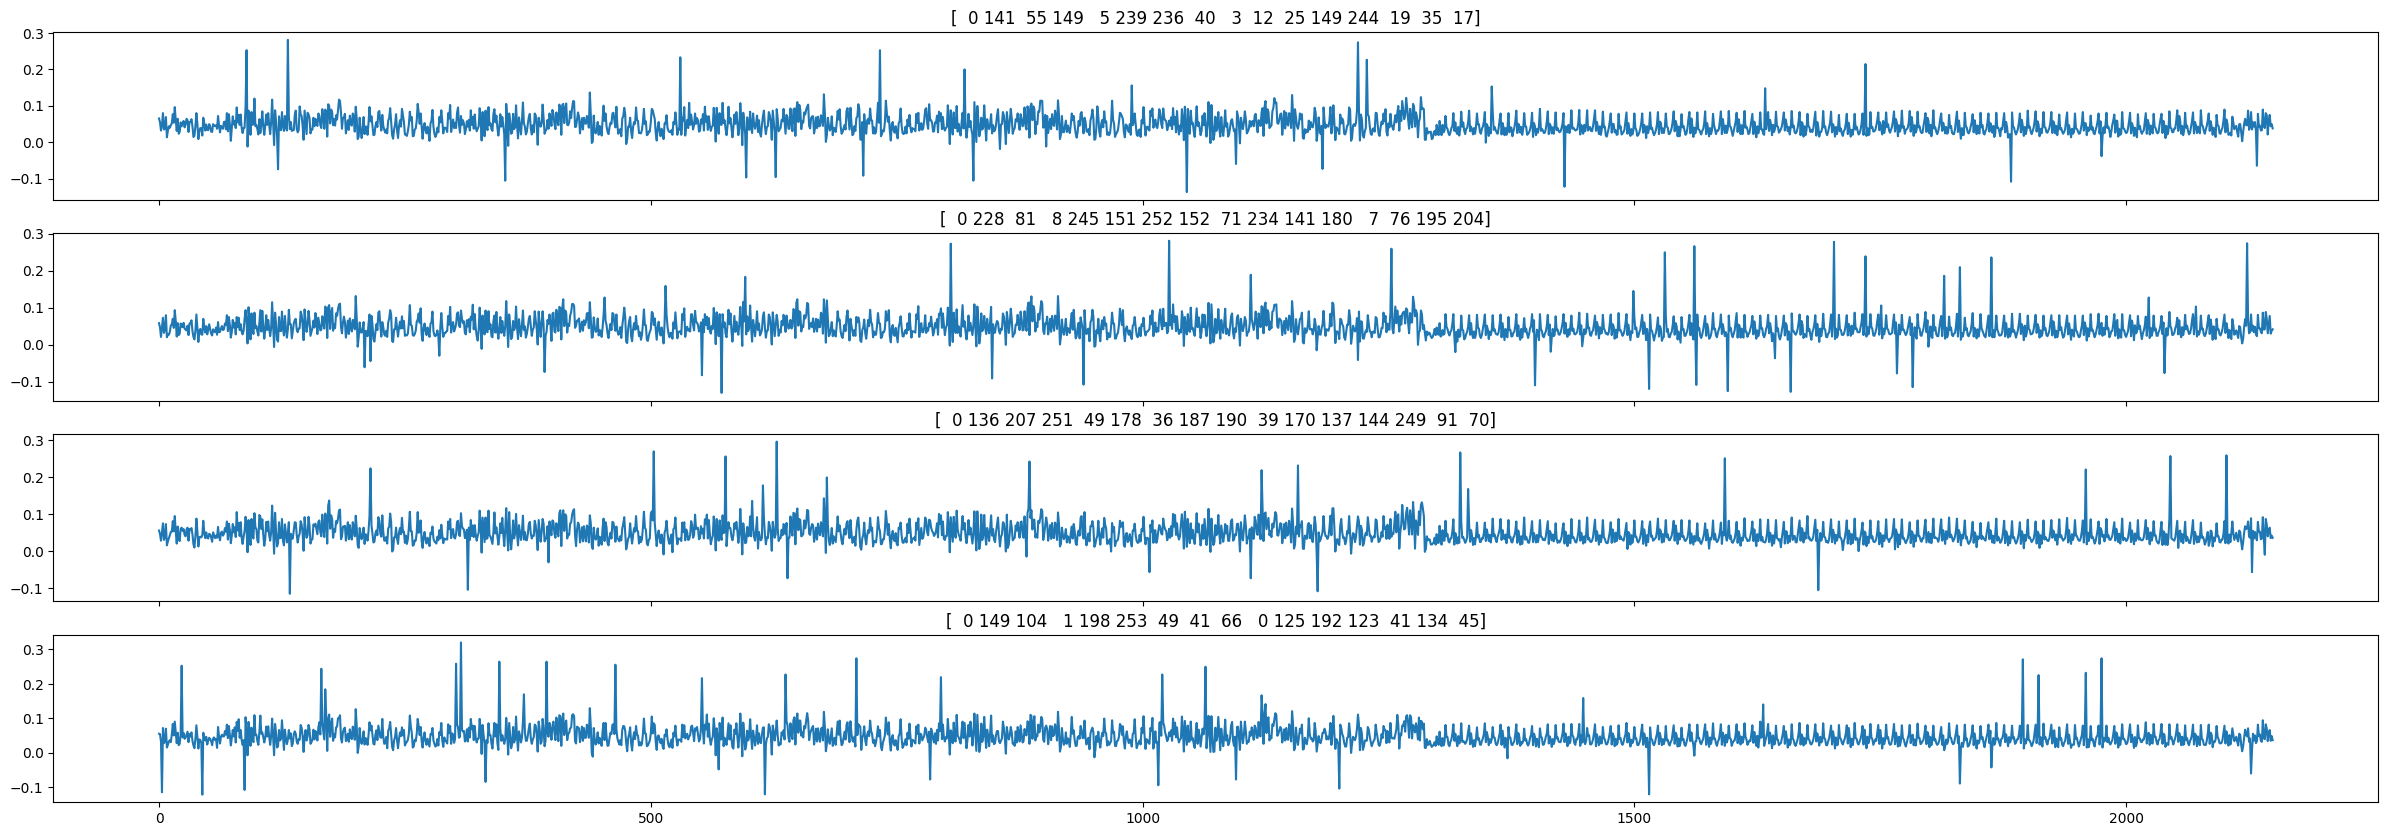

In [85]:
##Manoj
##Check the traces
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

project = cw.open_project("traces/f415_mbedtls_1500_nops.cwp")
print(project.location)
xShape = project.traces[0].wave.shape[0]
x=np.linspace(0,xShape-1, xShape)

#savePath = "/home/manojgopale/Documents/chipwhisperer/jupyter/courses/sca201/img/sca201_images/" + prjName + ".jpg"

fig, axs = plt.subplots(4, sharex=True, figsize=(30,10))
axs[0].plot(x,project.traces[0].wave)
axs[0].set_title(project.traces[0].key)
axs[1].plot(x,project.traces[1].wave)
axs[1].set_title(project.traces[1].key)
axs[2].plot(x,project.traces[8].wave)
axs[2].set_title(project.traces[8].key)
axs[3].plot(x,project.traces[9].wave)
axs[3].set_title(project.traces[9].key)
#print(proj.traces[0].wave.shape)

#fig.savefig(savePath)

In [27]:
project = cw.open_project("/mnt/hgfs/trace_key_trials/key_27.cwp")
trace_0 = project.traces[0].wave
print("maxVal= %s, minVal= %s" %(trace_0.max(), trace_0.min()))
minIdx = trace_0==-0.5
print("minIdx=%s" %(trace_0[minIdx].shape))

maxVal= 0.259765625, minVal= -0.5
minIdx=1


In [21]:
## Use this to save to npz, pkl format is not compatible across different versions of python.
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os
import numpy as np

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])
traceList = []
keyList = []

trainSize= 7500
devSize = 500
testSize = 500
# ##Adding traces for not complete 
# keysNotDone = [204, 228, 244, 245]
# count = 0
prjDir = "/mnt/hgfs/trace_key_f4_lat0_30db/"
saveDir = "/mnt/hgfs/trace_key_f4_lat0_30db_dataset/"

for keyVal in trange(256, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    traceList = []
    keyList = []
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        #df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
        traceList.append(trace.wave)
        keyList.append(trace.key)

    ##Create trace and key dataFrame        
    df_new["trace"] = traceList
    df_new["key"] = keyList

    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.iloc[0:trainSize, : ].reset_index(drop=True)
# #     df_dev   = df_new.iloc[trainSize:trainSize+devSize, : ].reset_index(drop=True)
# #     df_test  = df_new.iloc[trainSize+devSize:trainSize+devSize+testSize, : ].reset_index(drop=True)
    
    ##Save it to pkl
    saveTrain = saveDir + "/train_" + str(keyVal) + ".npz"
# #     saveDev   = saveDir + "/dev_" + str(keyVal) + ".npz"
# #     saveTest  = saveDir + "/test_" + str(keyVal) + ".npz"

    if (not os.path.exists(saveTrain)):
        np.savez_compressed(saveTrain, data=df_train)
        print("Saved key= %s to %s" %(keyVal, saveTrain))
        
# #     if (not os.path.exists(saveDev)):
# #         np.savez_compressed(saveDev, data=df_dev)
# #         print("Saved key= %s to %s" %(keyVal, saveDev))
    
# #     if (not os.path.exists(saveTest)):
# #         np.savez_compressed(saveTest, data=df_test)
# #         print("Saved key= %s to %s" %(keyVal, saveTest))

    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)
    df_train = None
#     df_dev = None
#     df_test = None


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:   0%|                                                                                                                       | 0/256 [00:00<?, ?it/s]

Started key= 0


Splitting data:   0%|▍                                                                                                            | 1/256 [00:17<1:13:03, 17.19s/it]

Saved key= 0 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_0.npz
Done saving files for key= 0
Started key= 1


Splitting data:   1%|▊                                                                                                            | 2/256 [00:34<1:13:17, 17.31s/it]

Saved key= 1 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_1.npz
Done saving files for key= 1
Started key= 2


Splitting data:   1%|█▎                                                                                                           | 3/256 [00:51<1:11:39, 17.00s/it]

Saved key= 2 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_2.npz
Done saving files for key= 2
Started key= 3


Splitting data:   2%|█▋                                                                                                           | 4/256 [01:07<1:10:38, 16.82s/it]

Saved key= 3 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_3.npz
Done saving files for key= 3
Started key= 4


Splitting data:   2%|██▏                                                                                                          | 5/256 [01:23<1:09:06, 16.52s/it]

Saved key= 4 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_4.npz
Done saving files for key= 4
Started key= 5


Splitting data:   2%|██▌                                                                                                          | 6/256 [01:41<1:10:01, 16.80s/it]

Saved key= 5 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_5.npz
Done saving files for key= 5
Started key= 6


Splitting data:   3%|██▉                                                                                                          | 7/256 [01:57<1:08:49, 16.58s/it]

Saved key= 6 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_6.npz
Done saving files for key= 6
Started key= 7


Splitting data:   3%|███▍                                                                                                         | 8/256 [02:13<1:08:44, 16.63s/it]

Saved key= 7 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_7.npz
Done saving files for key= 7
Started key= 8


Splitting data:   4%|███▊                                                                                                         | 9/256 [02:31<1:09:06, 16.79s/it]

Saved key= 8 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_8.npz
Done saving files for key= 8
Started key= 9


Splitting data:   4%|████▏                                                                                                       | 10/256 [02:47<1:08:36, 16.73s/it]

Saved key= 9 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_9.npz
Done saving files for key= 9
Started key= 10


Splitting data:   4%|████▋                                                                                                       | 11/256 [03:04<1:08:43, 16.83s/it]

Saved key= 10 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_10.npz
Done saving files for key= 10
Started key= 11


Splitting data:   5%|█████                                                                                                       | 12/256 [03:20<1:07:31, 16.61s/it]

Saved key= 11 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_11.npz
Done saving files for key= 11
Started key= 12


Splitting data:   5%|█████▍                                                                                                      | 13/256 [03:38<1:07:57, 16.78s/it]

Saved key= 12 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_12.npz
Done saving files for key= 12
Started key= 13


Splitting data:   5%|█████▉                                                                                                      | 14/256 [03:54<1:07:28, 16.73s/it]

Saved key= 13 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_13.npz
Done saving files for key= 13
Started key= 14


Splitting data:   6%|██████▎                                                                                                     | 15/256 [04:12<1:08:10, 16.97s/it]

Saved key= 14 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_14.npz
Done saving files for key= 14
Started key= 15


Splitting data:   6%|██████▊                                                                                                     | 16/256 [04:29<1:08:13, 17.06s/it]

Saved key= 15 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_15.npz
Done saving files for key= 15
Started key= 16


Splitting data:   7%|███████▏                                                                                                    | 17/256 [04:45<1:07:06, 16.85s/it]

Saved key= 16 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_16.npz
Done saving files for key= 16
Started key= 17


Splitting data:   7%|███████▌                                                                                                    | 18/256 [05:02<1:06:49, 16.85s/it]

Saved key= 17 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_17.npz
Done saving files for key= 17
Started key= 18


Splitting data:   7%|████████                                                                                                    | 19/256 [05:19<1:06:08, 16.75s/it]

Saved key= 18 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_18.npz
Done saving files for key= 18
Started key= 19


Splitting data:   8%|████████▍                                                                                                   | 20/256 [05:36<1:06:18, 16.86s/it]

Saved key= 19 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_19.npz
Done saving files for key= 19
Started key= 20


Splitting data:   8%|████████▊                                                                                                   | 21/256 [05:52<1:05:34, 16.74s/it]

Saved key= 20 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_20.npz
Done saving files for key= 20
Started key= 21


Splitting data:   9%|█████████▎                                                                                                  | 22/256 [06:10<1:06:22, 17.02s/it]

Saved key= 21 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_21.npz
Done saving files for key= 21
Started key= 22


Splitting data:   9%|█████████▋                                                                                                  | 23/256 [06:27<1:06:13, 17.05s/it]

Saved key= 22 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_22.npz
Done saving files for key= 22
Started key= 23


Splitting data:   9%|██████████▏                                                                                                 | 24/256 [06:44<1:05:52, 17.04s/it]

Saved key= 23 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_23.npz
Done saving files for key= 23
Started key= 24


Splitting data:  10%|██████████▌                                                                                                 | 25/256 [07:02<1:06:24, 17.25s/it]

Saved key= 24 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_24.npz
Done saving files for key= 24
Started key= 25


Splitting data:  10%|██████████▉                                                                                                 | 26/256 [07:19<1:05:38, 17.12s/it]

Saved key= 25 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_25.npz
Done saving files for key= 25
Started key= 26


Splitting data:  11%|███████████▍                                                                                                | 27/256 [07:36<1:05:26, 17.15s/it]

Saved key= 26 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_26.npz
Done saving files for key= 26
Started key= 27


Splitting data:  11%|███████████▊                                                                                                | 28/256 [07:53<1:04:56, 17.09s/it]

Saved key= 27 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_27.npz
Done saving files for key= 27
Started key= 28


Splitting data:  11%|████████████▏                                                                                               | 29/256 [08:10<1:05:09, 17.22s/it]

Saved key= 28 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_28.npz
Done saving files for key= 28
Started key= 29


Splitting data:  12%|████████████▋                                                                                               | 30/256 [08:27<1:03:52, 16.96s/it]

Saved key= 29 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_29.npz
Done saving files for key= 29
Started key= 30


Splitting data:  12%|█████████████                                                                                               | 31/256 [08:44<1:03:43, 16.99s/it]

Saved key= 30 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_30.npz
Done saving files for key= 30
Started key= 31


Splitting data:  12%|█████████████▌                                                                                              | 32/256 [09:02<1:04:34, 17.30s/it]

Saved key= 31 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_31.npz
Done saving files for key= 31
Started key= 32


Splitting data:  13%|█████████████▉                                                                                              | 33/256 [09:19<1:03:45, 17.15s/it]

Saved key= 32 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_32.npz
Done saving files for key= 32
Started key= 33


Splitting data:  13%|██████████████▎                                                                                             | 34/256 [09:36<1:04:00, 17.30s/it]

Saved key= 33 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_33.npz
Done saving files for key= 33
Started key= 34


Splitting data:  14%|██████████████▊                                                                                             | 35/256 [09:54<1:03:49, 17.33s/it]

Saved key= 34 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_34.npz
Done saving files for key= 34
Started key= 35


Splitting data:  14%|███████████████▏                                                                                            | 36/256 [10:10<1:02:53, 17.15s/it]

Saved key= 35 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_35.npz
Done saving files for key= 35
Started key= 36


Splitting data:  14%|███████████████▌                                                                                            | 37/256 [10:27<1:02:12, 17.04s/it]

Saved key= 36 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_36.npz
Done saving files for key= 36
Started key= 37


Splitting data:  15%|████████████████                                                                                            | 38/256 [10:45<1:02:28, 17.20s/it]

Saved key= 37 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_37.npz
Done saving files for key= 37
Started key= 38


Splitting data:  15%|████████████████▍                                                                                           | 39/256 [11:02<1:02:39, 17.33s/it]

Saved key= 38 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_38.npz
Done saving files for key= 38
Started key= 39


Splitting data:  16%|████████████████▉                                                                                           | 40/256 [11:19<1:02:10, 17.27s/it]

Saved key= 39 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_39.npz
Done saving files for key= 39
Started key= 40


Splitting data:  16%|█████████████████▎                                                                                          | 41/256 [11:37<1:02:24, 17.41s/it]

Saved key= 40 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_40.npz
Done saving files for key= 40
Started key= 41


Splitting data:  16%|█████████████████▋                                                                                          | 42/256 [11:54<1:01:48, 17.33s/it]

Saved key= 41 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_41.npz
Done saving files for key= 41
Started key= 42


Splitting data:  17%|██████████████████▏                                                                                         | 43/256 [12:12<1:01:34, 17.35s/it]

Saved key= 42 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_42.npz
Done saving files for key= 42
Started key= 43


Splitting data:  17%|██████████████████▌                                                                                         | 44/256 [12:29<1:01:21, 17.36s/it]

Saved key= 43 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_43.npz
Done saving files for key= 43
Started key= 44


Splitting data:  18%|██████████████████▉                                                                                         | 45/256 [12:46<1:00:19, 17.15s/it]

Saved key= 44 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_44.npz
Done saving files for key= 44
Started key= 45


Splitting data:  18%|███████████████████▍                                                                                        | 46/256 [13:03<1:00:02, 17.15s/it]

Saved key= 45 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_45.npz
Done saving files for key= 45
Started key= 46


Splitting data:  18%|████████████████████▏                                                                                         | 47/256 [13:19<59:06, 16.97s/it]

Saved key= 46 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_46.npz
Done saving files for key= 46
Started key= 47


Splitting data:  19%|████████████████████▋                                                                                         | 48/256 [13:37<59:36, 17.20s/it]

Saved key= 47 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_47.npz
Done saving files for key= 47
Started key= 48


Splitting data:  19%|█████████████████████                                                                                         | 49/256 [13:54<58:52, 17.07s/it]

Saved key= 48 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_48.npz
Done saving files for key= 48
Started key= 49


Splitting data:  20%|█████████████████████▍                                                                                        | 50/256 [14:12<59:06, 17.21s/it]

Saved key= 49 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_49.npz
Done saving files for key= 49
Started key= 50


Splitting data:  20%|█████████████████████▉                                                                                        | 51/256 [14:28<57:35, 16.86s/it]

Saved key= 50 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_50.npz
Done saving files for key= 50
Started key= 51


Splitting data:  20%|██████████████████████▎                                                                                       | 52/256 [14:45<57:27, 16.90s/it]

Saved key= 51 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_51.npz
Done saving files for key= 51
Started key= 52


Splitting data:  21%|██████████████████████▊                                                                                       | 53/256 [15:02<57:53, 17.11s/it]

Saved key= 52 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_52.npz
Done saving files for key= 52
Started key= 53


Splitting data:  21%|███████████████████████▏                                                                                      | 54/256 [15:19<57:51, 17.18s/it]

Saved key= 53 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_53.npz
Done saving files for key= 53
Started key= 54


Splitting data:  21%|███████████████████████▋                                                                                      | 55/256 [15:38<58:34, 17.49s/it]

Saved key= 54 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_54.npz
Done saving files for key= 54
Started key= 55


Splitting data:  22%|████████████████████████                                                                                      | 56/256 [15:55<57:39, 17.30s/it]

Saved key= 55 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_55.npz
Done saving files for key= 55
Started key= 56


Splitting data:  22%|████████████████████████▍                                                                                     | 57/256 [16:11<56:48, 17.13s/it]

Saved key= 56 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_56.npz
Done saving files for key= 56
Started key= 57


Splitting data:  23%|████████████████████████▉                                                                                     | 58/256 [16:28<56:19, 17.07s/it]

Saved key= 57 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_57.npz
Done saving files for key= 57
Started key= 58


Splitting data:  23%|█████████████████████████▎                                                                                    | 59/256 [16:45<55:31, 16.91s/it]

Saved key= 58 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_58.npz
Done saving files for key= 58
Started key= 59


Splitting data:  23%|█████████████████████████▊                                                                                    | 60/256 [17:02<56:01, 17.15s/it]

Saved key= 59 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_59.npz
Done saving files for key= 59
Started key= 60


Splitting data:  24%|██████████████████████████▏                                                                                   | 61/256 [17:19<55:25, 17.06s/it]

Saved key= 60 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_60.npz
Done saving files for key= 60
Started key= 61


Splitting data:  24%|██████████████████████████▋                                                                                   | 62/256 [17:37<56:01, 17.33s/it]

Saved key= 61 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_61.npz
Done saving files for key= 61
Started key= 62


Splitting data:  25%|███████████████████████████                                                                                   | 63/256 [17:54<55:05, 17.13s/it]

Saved key= 62 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_62.npz
Done saving files for key= 62
Started key= 63


Splitting data:  25%|███████████████████████████▌                                                                                  | 64/256 [18:11<54:44, 17.11s/it]

Saved key= 63 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_63.npz
Done saving files for key= 63
Started key= 64


Splitting data:  25%|███████████████████████████▉                                                                                  | 65/256 [18:28<54:29, 17.12s/it]

Saved key= 64 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_64.npz
Done saving files for key= 64
Started key= 65


Splitting data:  26%|████████████████████████████▎                                                                                 | 66/256 [18:45<53:52, 17.02s/it]

Saved key= 65 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_65.npz
Done saving files for key= 65
Started key= 66


Splitting data:  26%|████████████████████████████▊                                                                                 | 67/256 [19:02<53:54, 17.11s/it]

Saved key= 66 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_66.npz
Done saving files for key= 66
Started key= 67


Splitting data:  27%|█████████████████████████████▏                                                                                | 68/256 [19:19<53:32, 17.09s/it]

Saved key= 67 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_67.npz
Done saving files for key= 67
Started key= 68


Splitting data:  27%|█████████████████████████████▋                                                                                | 69/256 [19:38<54:24, 17.46s/it]

Saved key= 68 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_68.npz
Done saving files for key= 68
Started key= 69


Splitting data:  27%|██████████████████████████████                                                                                | 70/256 [19:54<53:14, 17.17s/it]

Saved key= 69 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_69.npz
Done saving files for key= 69
Started key= 70


Splitting data:  28%|██████████████████████████████▌                                                                               | 71/256 [20:11<52:47, 17.12s/it]

Saved key= 70 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_70.npz
Done saving files for key= 70
Started key= 71


Splitting data:  28%|██████████████████████████████▉                                                                               | 72/256 [20:28<52:40, 17.18s/it]

Saved key= 71 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_71.npz
Done saving files for key= 71
Started key= 72


Splitting data:  29%|███████████████████████████████▎                                                                              | 73/256 [20:45<52:12, 17.12s/it]

Saved key= 72 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_72.npz
Done saving files for key= 72
Started key= 73


Splitting data:  29%|███████████████████████████████▊                                                                              | 74/256 [21:03<52:10, 17.20s/it]

Saved key= 73 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_73.npz
Done saving files for key= 73
Started key= 74


Splitting data:  29%|████████████████████████████████▏                                                                             | 75/256 [21:19<51:22, 17.03s/it]

Saved key= 74 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_74.npz
Done saving files for key= 74
Started key= 75


Splitting data:  30%|████████████████████████████████▋                                                                             | 76/256 [21:36<50:51, 16.95s/it]

Saved key= 75 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_75.npz
Done saving files for key= 75
Started key= 76


Splitting data:  30%|█████████████████████████████████                                                                             | 77/256 [21:53<50:49, 17.04s/it]

Saved key= 76 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_76.npz
Done saving files for key= 76
Started key= 77


Splitting data:  30%|█████████████████████████████████▌                                                                            | 78/256 [22:11<50:44, 17.10s/it]

Saved key= 77 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_77.npz
Done saving files for key= 77
Started key= 78


Splitting data:  31%|█████████████████████████████████▉                                                                            | 79/256 [22:27<50:11, 17.02s/it]

Saved key= 78 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_78.npz
Done saving files for key= 78
Started key= 79


Splitting data:  31%|██████████████████████████████████▍                                                                           | 80/256 [22:44<49:52, 17.00s/it]

Saved key= 79 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_79.npz
Done saving files for key= 79
Started key= 80


Splitting data:  32%|██████████████████████████████████▊                                                                           | 81/256 [23:01<49:37, 17.01s/it]

Saved key= 80 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_80.npz
Done saving files for key= 80
Started key= 81


Splitting data:  32%|███████████████████████████████████▏                                                                          | 82/256 [23:19<49:24, 17.04s/it]

Saved key= 81 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_81.npz
Done saving files for key= 81
Started key= 82


Splitting data:  32%|███████████████████████████████████▋                                                                          | 83/256 [23:36<49:10, 17.05s/it]

Saved key= 82 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_82.npz
Done saving files for key= 82
Started key= 83


Splitting data:  33%|████████████████████████████████████                                                                          | 84/256 [23:53<48:53, 17.06s/it]

Saved key= 83 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_83.npz
Done saving files for key= 83
Started key= 84


Splitting data:  33%|████████████████████████████████████▌                                                                         | 85/256 [24:10<48:32, 17.03s/it]

Saved key= 84 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_84.npz
Done saving files for key= 84
Started key= 85


Splitting data:  34%|████████████████████████████████████▉                                                                         | 86/256 [24:26<47:49, 16.88s/it]

Saved key= 85 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_85.npz
Done saving files for key= 85
Started key= 86


Splitting data:  34%|█████████████████████████████████████▍                                                                        | 87/256 [24:43<47:19, 16.80s/it]

Saved key= 86 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_86.npz
Done saving files for key= 86
Started key= 87


Splitting data:  34%|█████████████████████████████████████▊                                                                        | 88/256 [25:00<47:31, 16.97s/it]

Saved key= 87 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_87.npz
Done saving files for key= 87
Started key= 88


Splitting data:  35%|██████████████████████████████████████▏                                                                       | 89/256 [25:17<47:16, 16.99s/it]

Saved key= 88 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_88.npz
Done saving files for key= 88
Started key= 89


Splitting data:  35%|██████████████████████████████████████▋                                                                       | 90/256 [25:34<47:02, 17.00s/it]

Saved key= 89 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_89.npz
Done saving files for key= 89
Started key= 90


Splitting data:  36%|███████████████████████████████████████                                                                       | 91/256 [25:51<46:08, 16.78s/it]

Saved key= 90 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_90.npz
Done saving files for key= 90
Started key= 91


Splitting data:  36%|███████████████████████████████████████▌                                                                      | 92/256 [26:08<46:18, 16.94s/it]

Saved key= 91 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_91.npz
Done saving files for key= 91
Started key= 92


Splitting data:  36%|███████████████████████████████████████▉                                                                      | 93/256 [26:26<46:36, 17.16s/it]

Saved key= 92 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_92.npz
Done saving files for key= 92
Started key= 93


Splitting data:  37%|████████████████████████████████████████▍                                                                     | 94/256 [26:42<45:47, 16.96s/it]

Saved key= 93 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_93.npz
Done saving files for key= 93
Started key= 94


Splitting data:  37%|████████████████████████████████████████▊                                                                     | 95/256 [26:59<45:40, 17.02s/it]

Saved key= 94 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_94.npz
Done saving files for key= 94
Started key= 95


Splitting data:  38%|█████████████████████████████████████████▎                                                                    | 96/256 [27:16<45:08, 16.93s/it]

Saved key= 95 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_95.npz
Done saving files for key= 95
Started key= 96


Splitting data:  38%|█████████████████████████████████████████▋                                                                    | 97/256 [27:32<44:18, 16.72s/it]

Saved key= 96 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_96.npz
Done saving files for key= 96
Started key= 97


Splitting data:  38%|██████████████████████████████████████████                                                                    | 98/256 [27:48<43:28, 16.51s/it]

Saved key= 97 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_97.npz
Done saving files for key= 97
Started key= 98


Splitting data:  39%|██████████████████████████████████████████▌                                                                   | 99/256 [28:04<42:39, 16.30s/it]

Saved key= 98 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_98.npz
Done saving files for key= 98
Started key= 99


Splitting data:  39%|██████████████████████████████████████████▌                                                                  | 100/256 [28:20<42:06, 16.20s/it]

Saved key= 99 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_99.npz
Done saving files for key= 99
Started key= 100


Splitting data:  39%|███████████████████████████████████████████                                                                  | 101/256 [28:36<41:53, 16.21s/it]

Saved key= 100 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_100.npz
Done saving files for key= 100
Started key= 101


Splitting data:  40%|███████████████████████████████████████████▍                                                                 | 102/256 [28:52<41:36, 16.21s/it]

Saved key= 101 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_101.npz
Done saving files for key= 101
Started key= 102


Splitting data:  40%|███████████████████████████████████████████▊                                                                 | 103/256 [29:08<40:59, 16.08s/it]

Saved key= 102 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_102.npz
Done saving files for key= 102
Started key= 103


Splitting data:  41%|████████████████████████████████████████████▎                                                                | 104/256 [29:24<40:16, 15.90s/it]

Saved key= 103 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_103.npz
Done saving files for key= 103
Started key= 104


Splitting data:  41%|████████████████████████████████████████████▋                                                                | 105/256 [29:39<39:28, 15.69s/it]

Saved key= 104 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_104.npz
Done saving files for key= 104
Started key= 105


Splitting data:  41%|█████████████████████████████████████████████▏                                                               | 106/256 [29:54<39:04, 15.63s/it]

Saved key= 105 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_105.npz
Done saving files for key= 105
Started key= 106


Splitting data:  42%|█████████████████████████████████████████████▌                                                               | 107/256 [30:09<38:26, 15.48s/it]

Saved key= 106 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_106.npz
Done saving files for key= 106
Started key= 107


Splitting data:  42%|█████████████████████████████████████████████▉                                                               | 108/256 [30:24<37:43, 15.30s/it]

Saved key= 107 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_107.npz
Done saving files for key= 107
Started key= 108


Splitting data:  43%|██████████████████████████████████████████████▍                                                              | 109/256 [30:40<37:35, 15.34s/it]

Saved key= 108 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_108.npz
Done saving files for key= 108
Started key= 109


Splitting data:  43%|██████████████████████████████████████████████▊                                                              | 110/256 [30:55<37:05, 15.25s/it]

Saved key= 109 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_109.npz
Done saving files for key= 109
Started key= 110


Splitting data:  43%|███████████████████████████████████████████████▎                                                             | 111/256 [31:11<37:13, 15.41s/it]

Saved key= 110 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_110.npz
Done saving files for key= 110
Started key= 111


Splitting data:  44%|███████████████████████████████████████████████▋                                                             | 112/256 [31:25<36:34, 15.24s/it]

Saved key= 111 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_111.npz
Done saving files for key= 111
Started key= 112


Splitting data:  44%|████████████████████████████████████████████████                                                             | 113/256 [31:41<36:20, 15.25s/it]

Saved key= 112 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_112.npz
Done saving files for key= 112
Started key= 113


Splitting data:  45%|████████████████████████████████████████████████▌                                                            | 114/256 [31:56<35:47, 15.12s/it]

Saved key= 113 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_113.npz
Done saving files for key= 113
Started key= 114


Splitting data:  45%|████████████████████████████████████████████████▉                                                            | 115/256 [32:12<36:34, 15.56s/it]

Saved key= 114 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_114.npz
Done saving files for key= 114
Started key= 115


Splitting data:  45%|█████████████████████████████████████████████████▍                                                           | 116/256 [32:30<37:46, 16.19s/it]

Saved key= 115 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_115.npz
Done saving files for key= 115
Started key= 116


Splitting data:  46%|█████████████████████████████████████████████████▊                                                           | 117/256 [32:46<37:44, 16.29s/it]

Saved key= 116 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_116.npz
Done saving files for key= 116
Started key= 117


Splitting data:  46%|██████████████████████████████████████████████████▏                                                          | 118/256 [33:04<38:22, 16.69s/it]

Saved key= 117 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_117.npz
Done saving files for key= 117
Started key= 118


Splitting data:  46%|██████████████████████████████████████████████████▋                                                          | 119/256 [33:21<38:31, 16.87s/it]

Saved key= 118 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_118.npz
Done saving files for key= 118
Started key= 119


Splitting data:  47%|███████████████████████████████████████████████████                                                          | 120/256 [33:39<38:41, 17.07s/it]

Saved key= 119 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_119.npz
Done saving files for key= 119
Started key= 120


Splitting data:  47%|███████████████████████████████████████████████████▌                                                         | 121/256 [33:55<38:00, 16.89s/it]

Saved key= 120 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_120.npz
Done saving files for key= 120
Started key= 121


Splitting data:  48%|███████████████████████████████████████████████████▉                                                         | 122/256 [34:12<37:37, 16.85s/it]

Saved key= 121 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_121.npz
Done saving files for key= 121
Started key= 122


Splitting data:  48%|████████████████████████████████████████████████████▎                                                        | 123/256 [34:30<38:27, 17.35s/it]

Saved key= 122 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_122.npz
Done saving files for key= 122
Started key= 123


Splitting data:  48%|████████████████████████████████████████████████████▊                                                        | 124/256 [34:47<37:36, 17.10s/it]

Saved key= 123 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_123.npz
Done saving files for key= 123
Started key= 124


Splitting data:  49%|█████████████████████████████████████████████████████▏                                                       | 125/256 [35:04<37:33, 17.20s/it]

Saved key= 124 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_124.npz
Done saving files for key= 124
Started key= 125


Splitting data:  49%|█████████████████████████████████████████████████████▋                                                       | 126/256 [35:20<36:01, 16.63s/it]

Saved key= 125 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_125.npz
Done saving files for key= 125
Started key= 126


Splitting data:  50%|██████████████████████████████████████████████████████                                                       | 127/256 [35:36<35:14, 16.39s/it]

Saved key= 126 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_126.npz
Done saving files for key= 126
Started key= 127


Splitting data:  50%|██████████████████████████████████████████████████████▌                                                      | 128/256 [35:51<34:02, 15.96s/it]

Saved key= 127 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_127.npz
Done saving files for key= 127
Started key= 128


Splitting data:  50%|██████████████████████████████████████████████████████▉                                                      | 129/256 [36:06<33:36, 15.88s/it]

Saved key= 128 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_128.npz
Done saving files for key= 128
Started key= 129


Splitting data:  51%|███████████████████████████████████████████████████████▎                                                     | 130/256 [36:21<32:56, 15.69s/it]

Saved key= 129 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_129.npz
Done saving files for key= 129
Started key= 130


Splitting data:  51%|███████████████████████████████████████████████████████▊                                                     | 131/256 [36:37<32:19, 15.52s/it]

Saved key= 130 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_130.npz
Done saving files for key= 130
Started key= 131


Splitting data:  52%|████████████████████████████████████████████████████████▏                                                    | 132/256 [36:51<31:41, 15.34s/it]

Saved key= 131 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_131.npz
Done saving files for key= 131
Started key= 132


Splitting data:  52%|████████████████████████████████████████████████████████▋                                                    | 133/256 [37:07<31:28, 15.35s/it]

Saved key= 132 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_132.npz
Done saving files for key= 132
Started key= 133


Splitting data:  52%|█████████████████████████████████████████████████████████                                                    | 134/256 [37:22<30:59, 15.24s/it]

Saved key= 133 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_133.npz
Done saving files for key= 133
Started key= 134


Splitting data:  53%|█████████████████████████████████████████████████████████▍                                                   | 135/256 [37:37<30:49, 15.28s/it]

Saved key= 134 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_134.npz
Done saving files for key= 134
Started key= 135


Splitting data:  53%|█████████████████████████████████████████████████████████▉                                                   | 136/256 [37:53<30:35, 15.30s/it]

Saved key= 135 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_135.npz
Done saving files for key= 135
Started key= 136


Splitting data:  54%|██████████████████████████████████████████████████████████▎                                                  | 137/256 [38:08<30:37, 15.44s/it]

Saved key= 136 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_136.npz
Done saving files for key= 136
Started key= 137


Splitting data:  54%|██████████████████████████████████████████████████████████▊                                                  | 138/256 [38:24<30:15, 15.38s/it]

Saved key= 137 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_137.npz
Done saving files for key= 137
Started key= 138


Splitting data:  54%|███████████████████████████████████████████████████████████▏                                                 | 139/256 [38:39<29:59, 15.38s/it]

Saved key= 138 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_138.npz
Done saving files for key= 138
Started key= 139


Splitting data:  55%|███████████████████████████████████████████████████████████▌                                                 | 140/256 [38:54<29:32, 15.28s/it]

Saved key= 139 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_139.npz
Done saving files for key= 139
Started key= 140


Splitting data:  55%|████████████████████████████████████████████████████████████                                                 | 141/256 [39:09<29:10, 15.22s/it]

Saved key= 140 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_140.npz
Done saving files for key= 140
Started key= 141


Splitting data:  55%|████████████████████████████████████████████████████████████▍                                                | 142/256 [39:24<29:01, 15.28s/it]

Saved key= 141 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_141.npz
Done saving files for key= 141
Started key= 142


Splitting data:  56%|████████████████████████████████████████████████████████████▉                                                | 143/256 [39:40<28:43, 15.26s/it]

Saved key= 142 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_142.npz
Done saving files for key= 142
Started key= 143


Splitting data:  56%|█████████████████████████████████████████████████████████████▎                                               | 144/256 [39:54<28:11, 15.10s/it]

Saved key= 143 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_143.npz
Done saving files for key= 143
Started key= 144


Splitting data:  57%|█████████████████████████████████████████████████████████████▋                                               | 145/256 [40:10<27:55, 15.09s/it]

Saved key= 144 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_144.npz
Done saving files for key= 144
Started key= 145


Splitting data:  57%|██████████████████████████████████████████████████████████████▏                                              | 146/256 [40:25<27:38, 15.08s/it]

Saved key= 145 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_145.npz
Done saving files for key= 145
Started key= 146


Splitting data:  57%|██████████████████████████████████████████████████████████████▌                                              | 147/256 [40:40<27:47, 15.29s/it]

Saved key= 146 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_146.npz
Done saving files for key= 146
Started key= 147


Splitting data:  58%|███████████████████████████████████████████████████████████████                                              | 148/256 [40:56<27:37, 15.35s/it]

Saved key= 147 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_147.npz
Done saving files for key= 147
Started key= 148


Splitting data:  58%|███████████████████████████████████████████████████████████████▍                                             | 149/256 [41:11<27:11, 15.25s/it]

Saved key= 148 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_148.npz
Done saving files for key= 148
Started key= 149


Splitting data:  59%|███████████████████████████████████████████████████████████████▊                                             | 150/256 [41:26<26:43, 15.13s/it]

Saved key= 149 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_149.npz
Done saving files for key= 149
Started key= 150


Splitting data:  59%|████████████████████████████████████████████████████████████████▎                                            | 151/256 [41:41<26:36, 15.21s/it]

Saved key= 150 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_150.npz
Done saving files for key= 150
Started key= 151


Splitting data:  59%|████████████████████████████████████████████████████████████████▋                                            | 152/256 [41:56<26:09, 15.09s/it]

Saved key= 151 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_151.npz
Done saving files for key= 151
Started key= 152


Splitting data:  60%|█████████████████████████████████████████████████████████████████▏                                           | 153/256 [42:11<25:53, 15.08s/it]

Saved key= 152 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_152.npz
Done saving files for key= 152
Started key= 153


Splitting data:  60%|█████████████████████████████████████████████████████████████████▌                                           | 154/256 [42:26<25:40, 15.11s/it]

Saved key= 153 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_153.npz
Done saving files for key= 153
Started key= 154


Splitting data:  61%|█████████████████████████████████████████████████████████████████▉                                           | 155/256 [42:41<25:30, 15.15s/it]

Saved key= 154 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_154.npz
Done saving files for key= 154
Started key= 155


Splitting data:  61%|██████████████████████████████████████████████████████████████████▍                                          | 156/256 [42:57<25:15, 15.16s/it]

Saved key= 155 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_155.npz
Done saving files for key= 155
Started key= 156


Splitting data:  61%|██████████████████████████████████████████████████████████████████▊                                          | 157/256 [43:11<24:51, 15.06s/it]

Saved key= 156 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_156.npz
Done saving files for key= 156
Started key= 157


Splitting data:  62%|███████████████████████████████████████████████████████████████████▎                                         | 158/256 [43:27<24:45, 15.16s/it]

Saved key= 157 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_157.npz
Done saving files for key= 157
Started key= 158


Splitting data:  62%|███████████████████████████████████████████████████████████████████▋                                         | 159/256 [43:42<24:26, 15.12s/it]

Saved key= 158 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_158.npz
Done saving files for key= 158
Started key= 159


Splitting data:  62%|████████████████████████████████████████████████████████████████████▏                                        | 160/256 [43:57<24:01, 15.02s/it]

Saved key= 159 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_159.npz
Done saving files for key= 159
Started key= 160


Splitting data:  63%|████████████████████████████████████████████████████████████████████▌                                        | 161/256 [44:12<23:43, 14.98s/it]

Saved key= 160 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_160.npz
Done saving files for key= 160
Started key= 161


Splitting data:  63%|████████████████████████████████████████████████████████████████████▉                                        | 162/256 [44:27<23:33, 15.03s/it]

Saved key= 161 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_161.npz
Done saving files for key= 161
Started key= 162


Splitting data:  64%|█████████████████████████████████████████████████████████████████████▍                                       | 163/256 [44:43<23:41, 15.29s/it]

Saved key= 162 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_162.npz
Done saving files for key= 162
Started key= 163


Splitting data:  64%|█████████████████████████████████████████████████████████████████████▊                                       | 164/256 [44:58<23:30, 15.33s/it]

Saved key= 163 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_163.npz
Done saving files for key= 163
Started key= 164


Splitting data:  64%|██████████████████████████████████████████████████████████████████████▎                                      | 165/256 [45:14<23:28, 15.48s/it]

Saved key= 164 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_164.npz
Done saving files for key= 164
Started key= 165


Splitting data:  65%|██████████████████████████████████████████████████████████████████████▋                                      | 166/256 [45:29<23:08, 15.42s/it]

Saved key= 165 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_165.npz
Done saving files for key= 165
Started key= 166


Splitting data:  65%|███████████████████████████████████████████████████████████████████████                                      | 167/256 [45:45<22:57, 15.48s/it]

Saved key= 166 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_166.npz
Done saving files for key= 166
Started key= 167


Splitting data:  66%|███████████████████████████████████████████████████████████████████████▌                                     | 168/256 [46:00<22:47, 15.54s/it]

Saved key= 167 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_167.npz
Done saving files for key= 167
Started key= 168


Splitting data:  66%|███████████████████████████████████████████████████████████████████████▉                                     | 169/256 [46:15<22:18, 15.38s/it]

Saved key= 168 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_168.npz
Done saving files for key= 168
Started key= 169


Splitting data:  66%|████████████████████████████████████████████████████████████████████████▍                                    | 170/256 [46:33<23:10, 16.17s/it]

Saved key= 169 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_169.npz
Done saving files for key= 169
Started key= 170


Splitting data:  67%|████████████████████████████████████████████████████████████████████████▊                                    | 171/256 [46:48<22:26, 15.84s/it]

Saved key= 170 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_170.npz
Done saving files for key= 170
Started key= 171


Splitting data:  67%|█████████████████████████████████████████████████████████████████████████▏                                   | 172/256 [47:05<22:16, 15.90s/it]

Saved key= 171 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_171.npz
Done saving files for key= 171
Started key= 172


Splitting data:  68%|█████████████████████████████████████████████████████████████████████████▋                                   | 173/256 [47:20<21:49, 15.78s/it]

Saved key= 172 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_172.npz
Done saving files for key= 172
Started key= 173


Splitting data:  68%|██████████████████████████████████████████████████████████████████████████                                   | 174/256 [47:36<21:32, 15.76s/it]

Saved key= 173 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_173.npz
Done saving files for key= 173
Started key= 174


Splitting data:  68%|██████████████████████████████████████████████████████████████████████████▌                                  | 175/256 [47:51<21:06, 15.63s/it]

Saved key= 174 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_174.npz
Done saving files for key= 174
Started key= 175


Splitting data:  69%|██████████████████████████████████████████████████████████████████████████▉                                  | 176/256 [48:07<20:51, 15.64s/it]

Saved key= 175 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_175.npz
Done saving files for key= 175
Started key= 176


Splitting data:  69%|███████████████████████████████████████████████████████████████████████████▎                                 | 177/256 [48:22<20:26, 15.53s/it]

Saved key= 176 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_176.npz
Done saving files for key= 176
Started key= 177


Splitting data:  70%|███████████████████████████████████████████████████████████████████████████▊                                 | 178/256 [48:37<20:08, 15.50s/it]

Saved key= 177 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_177.npz
Done saving files for key= 177
Started key= 178


Splitting data:  70%|████████████████████████████████████████████████████████████████████████████▏                                | 179/256 [48:53<19:58, 15.56s/it]

Saved key= 178 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_178.npz
Done saving files for key= 178
Started key= 179


Splitting data:  70%|████████████████████████████████████████████████████████████████████████████▋                                | 180/256 [49:08<19:37, 15.49s/it]

Saved key= 179 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_179.npz
Done saving files for key= 179
Started key= 180


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████████                                | 181/256 [49:24<19:14, 15.39s/it]

Saved key= 180 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_180.npz
Done saving files for key= 180
Started key= 181


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████████▍                               | 182/256 [49:39<18:59, 15.40s/it]

Saved key= 181 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_181.npz
Done saving files for key= 181
Started key= 182


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████████▉                               | 183/256 [49:54<18:32, 15.24s/it]

Saved key= 182 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_182.npz
Done saving files for key= 182
Started key= 183


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████████▎                              | 184/256 [50:10<18:27, 15.38s/it]

Saved key= 183 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_183.npz
Done saving files for key= 183
Started key= 184


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████████▊                              | 185/256 [50:25<18:07, 15.32s/it]

Saved key= 184 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_184.npz
Done saving files for key= 184
Started key= 185


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████████▏                             | 186/256 [50:40<17:56, 15.38s/it]

Saved key= 185 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_185.npz
Done saving files for key= 185
Started key= 186


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████████▌                             | 187/256 [50:56<17:39, 15.36s/it]

Saved key= 186 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_186.npz
Done saving files for key= 186
Started key= 187


Splitting data:  73%|████████████████████████████████████████████████████████████████████████████████                             | 188/256 [51:11<17:34, 15.50s/it]

Saved key= 187 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_187.npz
Done saving files for key= 187
Started key= 188


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████████▍                            | 189/256 [51:27<17:13, 15.43s/it]

Saved key= 188 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_188.npz
Done saving files for key= 188
Started key= 189


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████████▉                            | 190/256 [51:42<17:04, 15.52s/it]

Saved key= 189 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_189.npz
Done saving files for key= 189
Started key= 190


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████████▎                           | 191/256 [51:57<16:38, 15.37s/it]

Saved key= 190 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_190.npz
Done saving files for key= 190
Started key= 191


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████████▊                           | 192/256 [52:13<16:27, 15.42s/it]

Saved key= 191 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_191.npz
Done saving files for key= 191
Started key= 192


Splitting data:  75%|██████████████████████████████████████████████████████████████████████████████████▏                          | 193/256 [52:28<16:04, 15.31s/it]

Saved key= 192 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_192.npz
Done saving files for key= 192
Started key= 193


Splitting data:  76%|██████████████████████████████████████████████████████████████████████████████████▌                          | 194/256 [52:43<15:46, 15.26s/it]

Saved key= 193 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_193.npz
Done saving files for key= 193
Started key= 194


Splitting data:  76%|███████████████████████████████████████████████████████████████████████████████████                          | 195/256 [52:59<15:42, 15.45s/it]

Saved key= 194 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_194.npz
Done saving files for key= 194
Started key= 195


Splitting data:  77%|███████████████████████████████████████████████████████████████████████████████████▍                         | 196/256 [53:14<15:22, 15.37s/it]

Saved key= 195 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_195.npz
Done saving files for key= 195
Started key= 196


Splitting data:  77%|███████████████████████████████████████████████████████████████████████████████████▉                         | 197/256 [53:31<15:22, 15.63s/it]

Saved key= 196 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_196.npz
Done saving files for key= 196
Started key= 197


Splitting data:  77%|████████████████████████████████████████████████████████████████████████████████████▎                        | 198/256 [53:46<15:00, 15.52s/it]

Saved key= 197 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_197.npz
Done saving files for key= 197
Started key= 198


Splitting data:  78%|████████████████████████████████████████████████████████████████████████████████████▋                        | 199/256 [54:02<14:54, 15.69s/it]

Saved key= 198 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_198.npz
Done saving files for key= 198
Started key= 199


Splitting data:  78%|█████████████████████████████████████████████████████████████████████████████████████▏                       | 200/256 [54:17<14:32, 15.58s/it]

Saved key= 199 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_199.npz
Done saving files for key= 199
Started key= 200


Splitting data:  79%|█████████████████████████████████████████████████████████████████████████████████████▌                       | 201/256 [54:33<14:27, 15.78s/it]

Saved key= 200 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_200.npz
Done saving files for key= 200
Started key= 201


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████████                       | 202/256 [54:49<14:05, 15.65s/it]

Saved key= 201 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_201.npz
Done saving files for key= 201
Started key= 202


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████████▍                      | 203/256 [55:05<13:59, 15.84s/it]

Saved key= 202 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_202.npz
Done saving files for key= 202
Started key= 203


Splitting data:  80%|██████████████████████████████████████████████████████████████████████████████████████▊                      | 204/256 [55:20<13:33, 15.64s/it]

Saved key= 203 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_203.npz
Done saving files for key= 203
Started key= 204


Splitting data:  80%|███████████████████████████████████████████████████████████████████████████████████████▎                     | 205/256 [55:36<13:18, 15.66s/it]

Saved key= 204 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_204.npz
Done saving files for key= 204
Started key= 205


Splitting data:  80%|███████████████████████████████████████████████████████████████████████████████████████▋                     | 206/256 [55:51<12:58, 15.58s/it]

Saved key= 205 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_205.npz
Done saving files for key= 205
Started key= 206


Splitting data:  81%|████████████████████████████████████████████████████████████████████████████████████████▏                    | 207/256 [56:07<12:41, 15.53s/it]

Saved key= 206 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_206.npz
Done saving files for key= 206
Started key= 207


Splitting data:  81%|████████████████████████████████████████████████████████████████████████████████████████▌                    | 208/256 [56:22<12:27, 15.58s/it]

Saved key= 207 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_207.npz
Done saving files for key= 207
Started key= 208


Splitting data:  82%|████████████████████████████████████████████████████████████████████████████████████████▉                    | 209/256 [56:39<12:21, 15.78s/it]

Saved key= 208 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_208.npz
Done saving files for key= 208
Started key= 209


Splitting data:  82%|█████████████████████████████████████████████████████████████████████████████████████████▍                   | 210/256 [56:54<12:03, 15.72s/it]

Saved key= 209 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_209.npz
Done saving files for key= 209
Started key= 210


Splitting data:  82%|█████████████████████████████████████████████████████████████████████████████████████████▊                   | 211/256 [57:10<11:47, 15.72s/it]

Saved key= 210 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_210.npz
Done saving files for key= 210
Started key= 211


Splitting data:  83%|██████████████████████████████████████████████████████████████████████████████████████████▎                  | 212/256 [57:26<11:29, 15.68s/it]

Saved key= 211 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_211.npz
Done saving files for key= 211
Started key= 212


Splitting data:  83%|██████████████████████████████████████████████████████████████████████████████████████████▋                  | 213/256 [57:41<11:17, 15.74s/it]

Saved key= 212 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_212.npz
Done saving files for key= 212
Started key= 213


Splitting data:  84%|███████████████████████████████████████████████████████████████████████████████████████████                  | 214/256 [57:57<11:01, 15.74s/it]

Saved key= 213 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_213.npz
Done saving files for key= 213
Started key= 214


Splitting data:  84%|███████████████████████████████████████████████████████████████████████████████████████████▌                 | 215/256 [58:13<10:49, 15.85s/it]

Saved key= 214 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_214.npz
Done saving files for key= 214
Started key= 215


Splitting data:  84%|███████████████████████████████████████████████████████████████████████████████████████████▉                 | 216/256 [58:29<10:35, 15.90s/it]

Saved key= 215 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_215.npz
Done saving files for key= 215
Started key= 216


Splitting data:  85%|████████████████████████████████████████████████████████████████████████████████████████████▍                | 217/256 [58:45<10:14, 15.75s/it]

Saved key= 216 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_216.npz
Done saving files for key= 216
Started key= 217


Splitting data:  85%|████████████████████████████████████████████████████████████████████████████████████████████▊                | 218/256 [59:00<09:56, 15.69s/it]

Saved key= 217 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_217.npz
Done saving files for key= 217
Started key= 218


Splitting data:  86%|█████████████████████████████████████████████████████████████████████████████████████████████▏               | 219/256 [59:17<09:47, 15.89s/it]

Saved key= 218 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_218.npz
Done saving files for key= 218
Started key= 219


Splitting data:  86%|█████████████████████████████████████████████████████████████████████████████████████████████▋               | 220/256 [59:33<09:33, 15.93s/it]

Saved key= 219 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_219.npz
Done saving files for key= 219
Started key= 220


Splitting data:  86%|██████████████████████████████████████████████████████████████████████████████████████████████               | 221/256 [59:48<09:16, 15.90s/it]

Saved key= 220 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_220.npz
Done saving files for key= 220
Started key= 221


Splitting data:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 222/256 [1:00:05<09:04, 16.00s/it]

Saved key= 221 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_221.npz
Done saving files for key= 221
Started key= 222


Splitting data:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 223/256 [1:00:20<08:42, 15.82s/it]

Saved key= 222 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_222.npz
Done saving files for key= 222
Started key= 223


Splitting data:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 224/256 [1:00:37<08:35, 16.12s/it]

Saved key= 223 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_223.npz
Done saving files for key= 223
Started key= 224


Splitting data:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 225/256 [1:00:53<08:14, 15.95s/it]

Saved key= 224 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_224.npz
Done saving files for key= 224
Started key= 225


Splitting data:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 226/256 [1:01:08<07:55, 15.84s/it]

Saved key= 225 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_225.npz
Done saving files for key= 225
Started key= 226


Splitting data:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 227/256 [1:01:24<07:37, 15.78s/it]

Saved key= 226 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_226.npz
Done saving files for key= 226
Started key= 227


Splitting data:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 228/256 [1:01:40<07:24, 15.87s/it]

Saved key= 227 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_227.npz
Done saving files for key= 227
Started key= 228


Splitting data:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 229/256 [1:01:56<07:13, 16.06s/it]

Saved key= 228 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_228.npz
Done saving files for key= 228
Started key= 229


Splitting data:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 230/256 [1:02:12<06:51, 15.81s/it]

Saved key= 229 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_229.npz
Done saving files for key= 229
Started key= 230


Splitting data:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 231/256 [1:02:27<06:32, 15.68s/it]

Saved key= 230 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_230.npz
Done saving files for key= 230
Started key= 231


Splitting data:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 232/256 [1:02:42<06:14, 15.59s/it]

Saved key= 231 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_231.npz
Done saving files for key= 231
Started key= 232


Splitting data:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 233/256 [1:02:58<05:58, 15.58s/it]

Saved key= 232 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_232.npz
Done saving files for key= 232
Started key= 233


Splitting data:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 234/256 [1:03:13<05:43, 15.59s/it]

Saved key= 233 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_233.npz
Done saving files for key= 233
Started key= 234


Splitting data:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 235/256 [1:03:29<05:29, 15.71s/it]

Saved key= 234 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_234.npz
Done saving files for key= 234
Started key= 235


Splitting data:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 236/256 [1:03:46<05:16, 15.82s/it]

Saved key= 235 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_235.npz
Done saving files for key= 235
Started key= 236


Splitting data:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 237/256 [1:04:02<05:03, 16.00s/it]

Saved key= 236 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_236.npz
Done saving files for key= 236
Started key= 237


Splitting data:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 238/256 [1:04:18<04:48, 16.03s/it]

Saved key= 237 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_237.npz
Done saving files for key= 237
Started key= 238


Splitting data:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 239/256 [1:04:34<04:33, 16.09s/it]

Saved key= 238 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_238.npz
Done saving files for key= 238
Started key= 239


Splitting data:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 240/256 [1:04:50<04:16, 16.04s/it]

Saved key= 239 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_239.npz
Done saving files for key= 239
Started key= 240


Splitting data:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 241/256 [1:05:07<04:01, 16.12s/it]

Saved key= 240 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_240.npz
Done saving files for key= 240
Started key= 241


Splitting data:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 242/256 [1:05:23<03:45, 16.09s/it]

Saved key= 241 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_241.npz
Done saving files for key= 241
Started key= 242


Splitting data:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 243/256 [1:05:38<03:28, 16.02s/it]

Saved key= 242 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_242.npz
Done saving files for key= 242
Started key= 243


Splitting data:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 244/256 [1:05:54<03:10, 15.85s/it]

Saved key= 243 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_243.npz
Done saving files for key= 243
Started key= 244


Splitting data:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 245/256 [1:06:10<02:53, 15.80s/it]

Saved key= 244 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_244.npz
Done saving files for key= 244
Started key= 245


Splitting data:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 246/256 [1:06:25<02:36, 15.68s/it]

Saved key= 245 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_245.npz
Done saving files for key= 245
Started key= 246


Splitting data:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 247/256 [1:06:41<02:21, 15.78s/it]

Saved key= 246 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_246.npz
Done saving files for key= 246
Started key= 247


Splitting data:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 248/256 [1:06:56<02:05, 15.65s/it]

Saved key= 247 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_247.npz
Done saving files for key= 247
Started key= 248


Splitting data:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 249/256 [1:07:12<01:49, 15.64s/it]

Saved key= 248 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_248.npz
Done saving files for key= 248
Started key= 249


Splitting data:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 250/256 [1:07:27<01:33, 15.60s/it]

Saved key= 249 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_249.npz
Done saving files for key= 249
Started key= 250


Splitting data:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 251/256 [1:07:43<01:17, 15.55s/it]

Saved key= 250 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_250.npz
Done saving files for key= 250
Started key= 251


Splitting data:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 252/256 [1:07:59<01:02, 15.70s/it]

Saved key= 251 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_251.npz
Done saving files for key= 251
Started key= 252


Splitting data:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 253/256 [1:08:14<00:46, 15.56s/it]

Saved key= 252 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_252.npz
Done saving files for key= 252
Started key= 253


Splitting data:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 254/256 [1:08:30<00:31, 15.57s/it]

Saved key= 253 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_253.npz
Done saving files for key= 253
Started key= 254


Splitting data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 255/256 [1:08:45<00:15, 15.36s/it]

Saved key= 254 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_254.npz
Done saving files for key= 254
Started key= 255


Splitting data: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [1:09:01<00:00, 16.18s/it]

Saved key= 255 to /mnt/hgfs/trace_key_f4_lat0_30db_dataset//train_255.npz
Done saving files for key= 255
Done saving all the traces



In [15]:
len(traceList)
len(keyList)
keyList[0]
df_new["trace"] = traceList
df_new["key"] = keyList
df_new.head()

,trace,key
0,"[-0.0166015625, -0.0341796875, -0.046875, 0.04...","[0, 5, 153, 190, 179, 160, 74, 74, 229, 172, 8..."
1,"[-0.01171875, -0.033203125, -0.0458984375, 0.0...","[0, 86, 47, 110, 227, 217, 198, 141, 190, 226,..."
2,"[-0.017578125, -0.0341796875, -0.0439453125, 0...","[0, 70, 250, 202, 217, 143, 172, 200, 167, 56,..."
3,"[-0.009765625, -0.029296875, -0.044921875, 0.0...","[0, 134, 0, 215, 188, 185, 181, 192, 83, 55, 3..."
4,"[-0.0166015625, -0.0341796875, -0.0458984375, ...","[0, 246, 237, 15, 71, 149, 80, 166, 80, 100, 5..."


In [25]:
##Check the saved data
import numpy as np

load_data = np.load("/mnt/hgfs/cw_f415_6000_dataset/train_254.npz", allow_pickle=True)["data"]


In [28]:
load_data[100][-1]

-2.0

In [33]:
##Save traces to npy for plotting in Mac
import chipwhisperer as cw
import numpy as np

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_26.cwp")
f303_35 = project.traces[0].wave

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_24.cwp")
f415_35 = project.traces[0].wave

project = cw.open_project("/mnt/hgfs/trace_key_trials/key_22.cwp")
l443_35 = project.traces[0].wave

np.savez_compressed("/mnt/hgfs/trace_key_trials/f303_f415_l443_35db.npz", f303=f303_35, f415=f415_35, l443=l443_35)

##To load
#f303_trace = np.load("/mnt/hgfs/trace_key_trials/f303_f415_l443_traces.npz")["f303"]


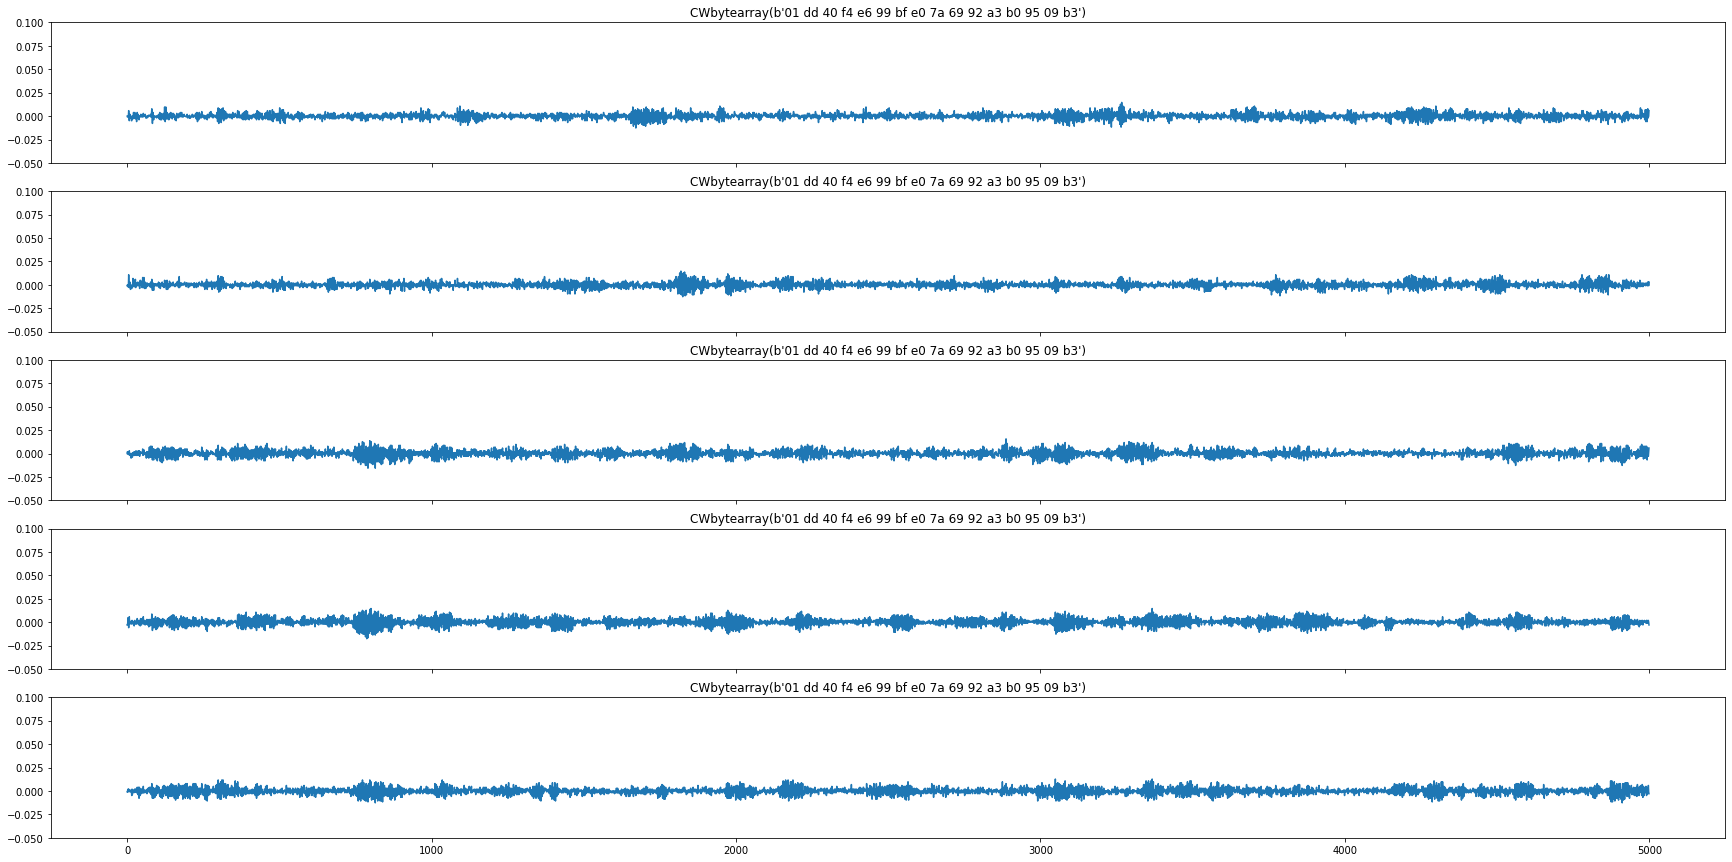

In [8]:
##Plot error
xShape = project.traces[0].wave.shape[0]
x=np.linspace(0,xShape-1, xShape)
savePath = "/home/manojgopale/Documents/chipwhisperer/jupyter/courses/sca201/img/sca201_images/" + prjName + "_error.jpg"

baseWave = project.traces[9].wave
fig, axs = plt.subplots(5, sharex=True, sharey=True, figsize=(30,15))
for i in range(5):
    targetWave = project.traces[i].wave
    axs[i].plot(x, baseWave-targetWave)
    axs[i].set_title(project.traces[i].key)
    axs[i].set_ylim([-0.05, 0.1])

#fig.savefig(savePath)

In [19]:
print(len(project.traces))
print(project.traces[0].key)
print(project.traces[1].key)

100
CWbytearray(b'ed 36 66 55 76 6d e6 d7 1a 3f 5d 67 f6 5a 4a 5f')
CWbytearray(b'fa dc e4 0c 24 3e 24 ed 78 fd 3d 89 8a 44 28 8f')


In [16]:
scope.dis()
target.dis()

In [28]:
##FFT
import scipy
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq

In [40]:
import chipwhisperer as cw
prjPath_1 = "/mnt/hgfs/trace_key_1500/key_100.cwp"
prj_1 = cw.open_project(prjPath_1)
print("Num traces = %s" %(len(prj_1.traces)))

Num traces = 8500


In [41]:
wave = prj_1.traces[0].wave
prj_1.traces[1000].key

array([100, 120, 159, 189, 229, 109, 244, 157,  90, 107, 248,  94,  63,
        92, 210, 219], dtype=uint8)

In [ ]:
##To remove DC component
print(wave)
wave = wave - wave.mean()
print(wave)

In [25]:
print(wave.shape)

(6000,)


In [42]:
scope.adc.decimate = 1
sample_rate = int(scope.clock.adc_rate)
total_samples = 1500
duration = total_samples/sample_rate

##total_samples = duration * sample_rate
print("sample_Rate=%s\nduration=%s\ntotal_samples=%s" %(sample_rate, duration, total_samples))
print("sample_rate=%s,\nduration=%s\ntotal_samples=%s" %(type(sample_rate), type(duration), type(total_samples)))

sample_Rate=29538459
duration=5.0781254364014044e-05
total_samples=1500
sample_rate=<class 'int'>,
duration=<class 'float'>
total_samples=<class 'int'>


In [43]:
yf = fft(wave)
xf = fftfreq(total_samples, 1/sample_rate)

In [33]:
yf

array([-7.10542736e-15-0.j        , -1.95778945e+00+3.58343891j,
       -5.41000082e+00+3.55089758j, ..., -4.54895464e+00+0.0122978j ,
       -5.41000082e+00-3.55089758j, -1.95778945e+00-3.58343891j])

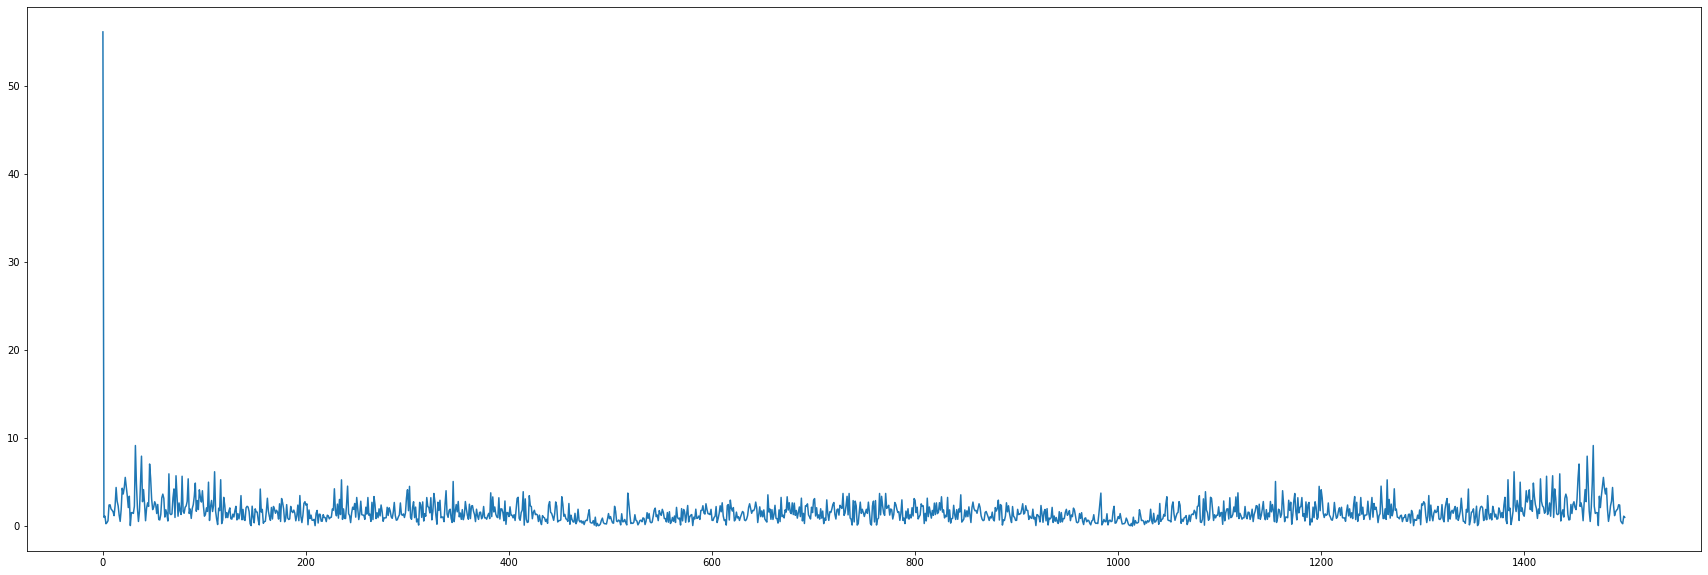

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(np.abs(yf))

[ 0.00195312 -0.00585938 -0.02050781 ... -0.01367188  0.00390625
 -0.06347656]
[-0.03548568 -0.04329818 -0.05794661 ... -0.05111068 -0.03353255
 -0.10091536]


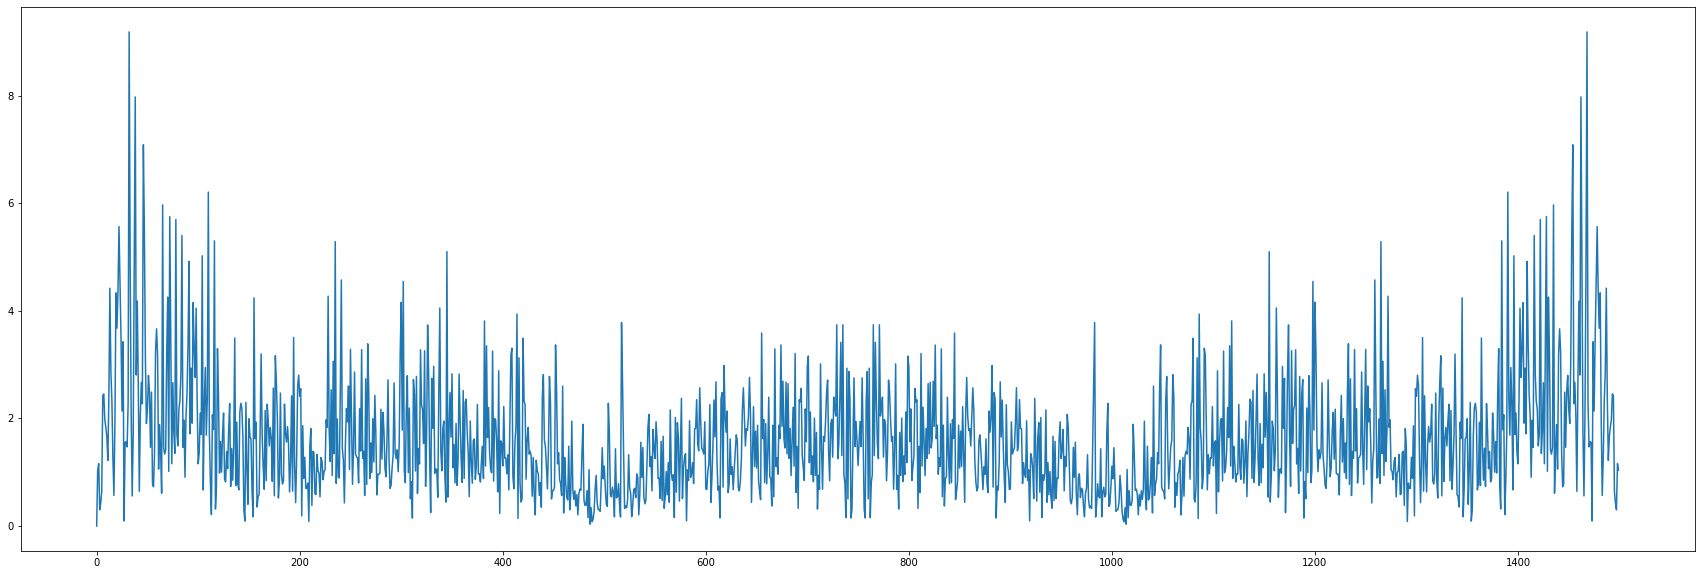

In [45]:
##To remove DC component
print(wave)
wave_noDC = wave - wave.mean()
print(wave_noDC)

yf = fft(wave_noDC)
xf = fftfreq(total_samples, 1/sample_rate)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(np.abs(yf))

In [15]:
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])

trainSize= 7500
devSize = 500
testSize = 500
# ##Adding traces for not complete 
# keysNotDone = [204, 228, 244, 245]
# count = 0
prjDir = "/mnt/hgfs/trace_key_l443/"
saveDir = "/mnt/hgfs/cw_l443_6000_dataset/"

for keyVal in trange(256, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.iloc[0:trainSize, : ].reset_index(drop=True)
    df_dev   = df_new.iloc[trainSize:trainSize+devSize, : ].reset_index(drop=True)
    df_test  = df_new.iloc[trainSize+devSize:trainSize+devSize+testSize, : ].reset_index(drop=True)
    
    ##Save it to pkl
    saveTrain = saveDir + "/train_" + str(keyVal) + ".pkl.zip"
    saveDev   = saveDir + "/dev_" + str(keyVal) + ".pkl.zip"
    saveTest  = saveDir + "/test_" + str(keyVal) + ".pkl.zip"

    df_train.to_pickle(saveTrain)
    df_dev.to_pickle(saveDev)
    df_test.to_pickle(saveTest)

    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:   0%|                                                                                                                     | 0/256 [00:00<?, ?it/s]

Started key= 0


Splitting data:   0%|▍                                                                                                          | 1/256 [00:59<4:14:05, 59.79s/it]

Done saving files for key= 0
Started key= 1


Splitting data:   1%|▊                                                                                                          | 2/256 [02:01<4:17:33, 60.84s/it]

Done saving files for key= 1
Started key= 2


Splitting data:   1%|█▎                                                                                                         | 3/256 [03:01<4:15:14, 60.53s/it]

Done saving files for key= 2
Started key= 3


Splitting data:   2%|█▋                                                                                                         | 4/256 [04:00<4:11:39, 59.92s/it]

Done saving files for key= 3
Started key= 4


Splitting data:   2%|██                                                                                                         | 5/256 [05:00<4:11:31, 60.12s/it]

Done saving files for key= 4
Started key= 5


Splitting data:   2%|██▌                                                                                                        | 6/256 [06:00<4:09:01, 59.77s/it]

Done saving files for key= 5
Started key= 6


Splitting data:   3%|██▉                                                                                                        | 7/256 [06:59<4:08:13, 59.81s/it]

Done saving files for key= 6
Started key= 7


Splitting data:   3%|███▎                                                                                                       | 8/256 [07:59<4:07:03, 59.77s/it]

Done saving files for key= 7
Started key= 8


Splitting data:   4%|███▊                                                                                                       | 9/256 [08:59<4:06:09, 59.80s/it]

Done saving files for key= 8
Started key= 9


Splitting data:   4%|████▏                                                                                                     | 10/256 [09:58<4:04:06, 59.54s/it]

Done saving files for key= 9
Started key= 10


Splitting data:   4%|████▌                                                                                                     | 11/256 [10:58<4:03:57, 59.74s/it]

Done saving files for key= 10
Started key= 11


Splitting data:   5%|████▉                                                                                                     | 12/256 [11:57<4:01:46, 59.45s/it]

Done saving files for key= 11
Started key= 12


Splitting data:   5%|█████▍                                                                                                    | 13/256 [12:57<4:01:00, 59.51s/it]

Done saving files for key= 12
Started key= 13


Splitting data:   5%|█████▊                                                                                                    | 14/256 [13:55<3:59:09, 59.30s/it]

Done saving files for key= 13
Started key= 14


Splitting data:   6%|██████▏                                                                                                   | 15/256 [15:00<4:04:23, 60.84s/it]

Done saving files for key= 14
Started key= 15


Splitting data:   6%|██████▋                                                                                                   | 16/256 [15:58<3:59:36, 59.90s/it]

Done saving files for key= 15
Started key= 16


Splitting data:   7%|███████                                                                                                   | 17/256 [16:55<3:55:11, 59.04s/it]

Done saving files for key= 16
Started key= 17


Splitting data:   7%|███████▍                                                                                                  | 18/256 [17:50<3:50:13, 58.04s/it]

Done saving files for key= 17
Started key= 18


Splitting data:   7%|███████▊                                                                                                  | 19/256 [18:55<3:57:17, 60.07s/it]

Done saving files for key= 18
Started key= 19


Splitting data:   8%|████████▎                                                                                                 | 20/256 [20:08<4:11:17, 63.89s/it]

Done saving files for key= 19
Started key= 20


Splitting data:   8%|████████▋                                                                                                 | 21/256 [21:16<4:15:32, 65.24s/it]

Done saving files for key= 20
Started key= 21


Splitting data:   9%|█████████                                                                                                 | 22/256 [22:24<4:17:41, 66.08s/it]

Done saving files for key= 21
Started key= 22


Splitting data:   9%|█████████▌                                                                                                | 23/256 [23:34<4:20:38, 67.12s/it]

Done saving files for key= 22
Started key= 23


Splitting data:   9%|█████████▉                                                                                                | 24/256 [24:43<4:21:30, 67.63s/it]

Done saving files for key= 23
Started key= 24


Splitting data:  10%|██████████▎                                                                                               | 25/256 [25:54<4:24:53, 68.80s/it]

Done saving files for key= 24
Started key= 25


Splitting data:  10%|██████████▊                                                                                               | 26/256 [27:03<4:24:01, 68.87s/it]

Done saving files for key= 25
Started key= 26


Splitting data:  11%|███████████▏                                                                                              | 27/256 [28:12<4:22:17, 68.72s/it]

Done saving files for key= 26
Started key= 27


Splitting data:  11%|███████████▌                                                                                              | 28/256 [29:20<4:20:20, 68.51s/it]

Done saving files for key= 27
Started key= 28


Splitting data:  11%|████████████                                                                                              | 29/256 [30:27<4:18:18, 68.28s/it]

Done saving files for key= 28
Started key= 29


Splitting data:  12%|████████████▍                                                                                             | 30/256 [31:36<4:17:49, 68.45s/it]

Done saving files for key= 29
Started key= 30


Splitting data:  12%|████████████▊                                                                                             | 31/256 [32:46<4:18:04, 68.82s/it]

Done saving files for key= 30
Started key= 31


Splitting data:  12%|█████████████▎                                                                                            | 32/256 [33:55<4:16:38, 68.74s/it]

Done saving files for key= 31
Started key= 32


Splitting data:  13%|█████████████▋                                                                                            | 33/256 [35:05<4:17:14, 69.21s/it]

Done saving files for key= 32
Started key= 33


Splitting data:  13%|██████████████                                                                                            | 34/256 [36:13<4:15:04, 68.94s/it]

Done saving files for key= 33
Started key= 34


Splitting data:  14%|██████████████▍                                                                                           | 35/256 [37:21<4:12:48, 68.64s/it]

Done saving files for key= 34
Started key= 35


Splitting data:  14%|██████████████▉                                                                                           | 36/256 [38:29<4:10:45, 68.39s/it]

Done saving files for key= 35
Started key= 36


Splitting data:  14%|███████████████▎                                                                                          | 37/256 [39:37<4:09:07, 68.25s/it]

Done saving files for key= 36
Started key= 37


Splitting data:  15%|███████████████▋                                                                                          | 38/256 [40:44<4:07:08, 68.02s/it]

Done saving files for key= 37
Started key= 38


Splitting data:  15%|████████████████▏                                                                                         | 39/256 [41:52<4:05:13, 67.81s/it]

Done saving files for key= 38
Started key= 39


Splitting data:  16%|████████████████▌                                                                                         | 40/256 [42:58<4:02:17, 67.30s/it]

Done saving files for key= 39
Started key= 40


Splitting data:  16%|████████████████▉                                                                                         | 41/256 [44:06<4:02:17, 67.62s/it]

Done saving files for key= 40
Started key= 41


Splitting data:  16%|█████████████████▍                                                                                        | 42/256 [45:14<4:01:58, 67.84s/it]

Done saving files for key= 41
Started key= 42


Splitting data:  17%|█████████████████▊                                                                                        | 43/256 [46:23<4:01:46, 68.11s/it]

Done saving files for key= 42
Started key= 43


Splitting data:  17%|██████████████████▏                                                                                       | 44/256 [47:31<4:00:41, 68.12s/it]

Done saving files for key= 43
Started key= 44


Splitting data:  18%|██████████████████▋                                                                                       | 45/256 [48:40<4:00:32, 68.40s/it]

Done saving files for key= 44
Started key= 45


Splitting data:  18%|███████████████████                                                                                       | 46/256 [49:48<3:58:43, 68.21s/it]

Done saving files for key= 45
Started key= 46


Splitting data:  18%|███████████████████▍                                                                                      | 47/256 [50:54<3:54:44, 67.39s/it]

Done saving files for key= 46
Started key= 47


Splitting data:  19%|███████████████████▉                                                                                      | 48/256 [52:00<3:52:56, 67.20s/it]

Done saving files for key= 47
Started key= 48


Splitting data:  19%|████████████████████▎                                                                                     | 49/256 [53:09<3:53:24, 67.66s/it]

Done saving files for key= 48
Started key= 49


Splitting data:  20%|████████████████████▋                                                                                     | 50/256 [54:15<3:50:09, 67.04s/it]

Done saving files for key= 49
Started key= 50


Splitting data:  20%|█████████████████████                                                                                     | 51/256 [55:10<3:37:17, 63.60s/it]

Done saving files for key= 50
Started key= 51


Splitting data:  20%|█████████████████████▌                                                                                    | 52/256 [56:06<3:27:49, 61.13s/it]

Done saving files for key= 51
Started key= 52


Splitting data:  21%|█████████████████████▉                                                                                    | 53/256 [57:33<3:53:37, 69.05s/it]

Done saving files for key= 52
Started key= 53


Splitting data:  21%|██████████████████████▎                                                                                   | 54/256 [58:28<3:38:03, 64.77s/it]

Done saving files for key= 53
Started key= 54


Splitting data:  21%|██████████████████████▊                                                                                   | 55/256 [59:23<3:26:45, 61.72s/it]

Done saving files for key= 54
Started key= 55


Splitting data:  22%|██████████████████████▊                                                                                 | 56/256 [1:00:17<3:18:34, 59.57s/it]

Done saving files for key= 55
Started key= 56


Splitting data:  22%|███████████████████████▏                                                                                | 57/256 [1:01:12<3:12:30, 58.04s/it]

Done saving files for key= 56
Started key= 57


Splitting data:  23%|███████████████████████▌                                                                                | 58/256 [1:02:07<3:08:56, 57.25s/it]

Done saving files for key= 57
Started key= 58


Splitting data:  23%|███████████████████████▉                                                                                | 59/256 [1:03:04<3:07:41, 57.16s/it]

Done saving files for key= 58
Started key= 59


Splitting data:  23%|████████████████████████▍                                                                               | 60/256 [1:04:03<3:08:31, 57.71s/it]

Done saving files for key= 59
Started key= 60


Splitting data:  24%|████████████████████████▊                                                                               | 61/256 [1:05:02<3:09:10, 58.21s/it]

Done saving files for key= 60
Started key= 61


Splitting data:  24%|█████████████████████████▏                                                                              | 62/256 [1:06:02<3:09:23, 58.58s/it]

Done saving files for key= 61
Started key= 62


Splitting data:  25%|█████████████████████████▌                                                                              | 63/256 [1:07:00<3:08:21, 58.55s/it]

Done saving files for key= 62
Started key= 63


Splitting data:  25%|██████████████████████████                                                                              | 64/256 [1:07:58<3:07:03, 58.46s/it]

Done saving files for key= 63
Started key= 64


Splitting data:  25%|██████████████████████████▍                                                                             | 65/256 [1:08:57<3:06:07, 58.47s/it]

Done saving files for key= 64
Started key= 65


Splitting data:  26%|██████████████████████████▊                                                                             | 66/256 [1:09:55<3:04:53, 58.39s/it]

Done saving files for key= 65
Started key= 66


Splitting data:  26%|███████████████████████████▏                                                                            | 67/256 [1:10:53<3:03:36, 58.29s/it]

Done saving files for key= 66
Started key= 67


Splitting data:  27%|███████████████████████████▋                                                                            | 68/256 [1:11:52<3:02:51, 58.36s/it]

Done saving files for key= 67
Started key= 68


Splitting data:  27%|████████████████████████████                                                                            | 69/256 [1:12:51<3:02:45, 58.64s/it]

Done saving files for key= 68
Started key= 69


Splitting data:  27%|████████████████████████████▍                                                                           | 70/256 [1:13:49<3:00:47, 58.32s/it]

Done saving files for key= 69
Started key= 70


Splitting data:  28%|████████████████████████████▊                                                                           | 71/256 [1:14:45<2:57:49, 57.67s/it]

Done saving files for key= 70
Started key= 71


Splitting data:  28%|█████████████████████████████▎                                                                          | 72/256 [1:15:40<2:54:56, 57.05s/it]

Done saving files for key= 71
Started key= 72


Splitting data:  29%|█████████████████████████████▋                                                                          | 73/256 [1:16:37<2:53:20, 56.83s/it]

Done saving files for key= 72
Started key= 73


Splitting data:  29%|██████████████████████████████                                                                          | 74/256 [1:17:32<2:51:08, 56.42s/it]

Done saving files for key= 73
Started key= 74


Splitting data:  29%|██████████████████████████████▍                                                                         | 75/256 [1:18:29<2:50:30, 56.52s/it]

Done saving files for key= 74
Started key= 75


Splitting data:  30%|██████████████████████████████▉                                                                         | 76/256 [1:19:25<2:49:23, 56.46s/it]

Done saving files for key= 75
Started key= 76


Splitting data:  30%|███████████████████████████████▎                                                                        | 77/256 [1:20:22<2:49:01, 56.65s/it]

Done saving files for key= 76
Started key= 77


Splitting data:  30%|███████████████████████████████▋                                                                        | 78/256 [1:21:19<2:47:48, 56.56s/it]

Done saving files for key= 77
Started key= 78


Splitting data:  31%|████████████████████████████████                                                                        | 79/256 [1:22:15<2:46:36, 56.48s/it]

Done saving files for key= 78
Started key= 79


Splitting data:  31%|████████████████████████████████▌                                                                       | 80/256 [1:23:13<2:46:55, 56.91s/it]

Done saving files for key= 79
Started key= 80


Splitting data:  32%|████████████████████████████████▉                                                                       | 81/256 [1:24:11<2:47:28, 57.42s/it]

Done saving files for key= 80
Started key= 81


Splitting data:  32%|█████████████████████████████████▎                                                                      | 82/256 [1:25:09<2:46:18, 57.35s/it]

Done saving files for key= 81
Started key= 82


Splitting data:  32%|█████████████████████████████████▋                                                                      | 83/256 [1:26:06<2:45:00, 57.23s/it]

Done saving files for key= 82
Started key= 83


Splitting data:  33%|██████████████████████████████████▏                                                                     | 84/256 [1:27:02<2:43:37, 57.08s/it]

Done saving files for key= 83
Started key= 84


Splitting data:  33%|██████████████████████████████████▌                                                                     | 85/256 [1:28:00<2:42:59, 57.19s/it]

Done saving files for key= 84
Started key= 85


Splitting data:  34%|██████████████████████████████████▉                                                                     | 86/256 [1:28:57<2:41:56, 57.15s/it]

Done saving files for key= 85
Started key= 86


Splitting data:  34%|███████████████████████████████████▎                                                                    | 87/256 [1:29:53<2:39:47, 56.73s/it]

Done saving files for key= 86
Started key= 87


Splitting data:  34%|███████████████████████████████████▊                                                                    | 88/256 [1:30:49<2:38:46, 56.71s/it]

Done saving files for key= 87
Started key= 88


Splitting data:  35%|████████████████████████████████████▏                                                                   | 89/256 [1:31:46<2:38:03, 56.79s/it]

Done saving files for key= 88
Started key= 89


Splitting data:  35%|████████████████████████████████████▌                                                                   | 90/256 [1:32:44<2:37:45, 57.02s/it]

Done saving files for key= 89
Started key= 90


Splitting data:  36%|████████████████████████████████████▉                                                                   | 91/256 [1:33:42<2:37:24, 57.24s/it]

Done saving files for key= 90
Started key= 91


Splitting data:  36%|█████████████████████████████████████▍                                                                  | 92/256 [1:34:39<2:36:42, 57.34s/it]

Done saving files for key= 91
Started key= 92


Splitting data:  36%|█████████████████████████████████████▊                                                                  | 93/256 [1:35:37<2:36:06, 57.46s/it]

Done saving files for key= 92
Started key= 93


Splitting data:  37%|██████████████████████████████████████▏                                                                 | 94/256 [1:36:34<2:34:56, 57.38s/it]

Done saving files for key= 93
Started key= 94


Splitting data:  37%|██████████████████████████████████████▌                                                                 | 95/256 [1:37:31<2:33:31, 57.21s/it]

Done saving files for key= 94
Started key= 95


Splitting data:  38%|███████████████████████████████████████                                                                 | 96/256 [1:38:28<2:32:14, 57.09s/it]

Done saving files for key= 95
Started key= 96


Splitting data:  38%|███████████████████████████████████████▍                                                                | 97/256 [1:39:24<2:30:43, 56.88s/it]

Done saving files for key= 96
Started key= 97


Splitting data:  38%|███████████████████████████████████████▊                                                                | 98/256 [1:40:21<2:29:51, 56.91s/it]

Done saving files for key= 97
Started key= 98


Splitting data:  39%|████████████████████████████████████████▏                                                               | 99/256 [1:41:17<2:28:19, 56.68s/it]

Done saving files for key= 98
Started key= 99


Splitting data:  39%|████████████████████████████████████████▏                                                              | 100/256 [1:42:15<2:28:31, 57.12s/it]

Done saving files for key= 99
Started key= 100


Splitting data:  39%|████████████████████████████████████████▋                                                              | 101/256 [1:43:13<2:27:43, 57.18s/it]

Done saving files for key= 100
Started key= 101


Splitting data:  40%|█████████████████████████████████████████                                                              | 102/256 [1:44:11<2:27:26, 57.44s/it]

Done saving files for key= 101
Started key= 102


Splitting data:  40%|█████████████████████████████████████████▍                                                             | 103/256 [1:45:08<2:26:44, 57.54s/it]

Done saving files for key= 102
Started key= 103


Splitting data:  41%|█████████████████████████████████████████▊                                                             | 104/256 [1:46:05<2:25:21, 57.38s/it]

Done saving files for key= 103
Started key= 104


Splitting data:  41%|██████████████████████████████████████████▏                                                            | 105/256 [1:47:03<2:24:13, 57.31s/it]

Done saving files for key= 104
Started key= 105


Splitting data:  41%|██████████████████████████████████████████▋                                                            | 106/256 [1:48:00<2:23:16, 57.31s/it]

Done saving files for key= 105
Started key= 106


Splitting data:  42%|███████████████████████████████████████████                                                            | 107/256 [1:48:57<2:22:28, 57.37s/it]

Done saving files for key= 106
Started key= 107


Splitting data:  42%|███████████████████████████████████████████▍                                                           | 108/256 [1:49:54<2:21:02, 57.18s/it]

Done saving files for key= 107
Started key= 108


Splitting data:  43%|███████████████████████████████████████████▊                                                           | 109/256 [1:50:51<2:20:04, 57.17s/it]

Done saving files for key= 108
Started key= 109


Splitting data:  43%|████████████████████████████████████████████▎                                                          | 110/256 [1:51:49<2:19:08, 57.18s/it]

Done saving files for key= 109
Started key= 110


Splitting data:  43%|████████████████████████████████████████████▋                                                          | 111/256 [1:52:45<2:17:44, 57.00s/it]

Done saving files for key= 110
Started key= 111


Splitting data:  44%|█████████████████████████████████████████████                                                          | 112/256 [1:53:42<2:17:03, 57.11s/it]

Done saving files for key= 111
Started key= 112


Splitting data:  44%|█████████████████████████████████████████████▍                                                         | 113/256 [1:54:40<2:16:21, 57.21s/it]

Done saving files for key= 112
Started key= 113


Splitting data:  45%|█████████████████████████████████████████████▊                                                         | 114/256 [1:55:37<2:15:30, 57.26s/it]

Done saving files for key= 113
Started key= 114


Splitting data:  45%|██████████████████████████████████████████████▎                                                        | 115/256 [1:56:35<2:14:33, 57.26s/it]

Done saving files for key= 114
Started key= 115


Splitting data:  45%|██████████████████████████████████████████████▋                                                        | 116/256 [1:57:32<2:13:48, 57.35s/it]

Done saving files for key= 115
Started key= 116


Splitting data:  46%|███████████████████████████████████████████████                                                        | 117/256 [1:58:29<2:12:41, 57.28s/it]

Done saving files for key= 116
Started key= 117


Splitting data:  46%|███████████████████████████████████████████████▍                                                       | 118/256 [1:59:27<2:11:54, 57.35s/it]

Done saving files for key= 117
Started key= 118


Splitting data:  46%|███████████████████████████████████████████████▉                                                       | 119/256 [2:00:23<2:10:26, 57.13s/it]

Done saving files for key= 118
Started key= 119


Splitting data:  47%|████████████████████████████████████████████████▎                                                      | 120/256 [2:01:20<2:09:21, 57.07s/it]

Done saving files for key= 119
Started key= 120


Splitting data:  47%|████████████████████████████████████████████████▋                                                      | 121/256 [2:02:17<2:07:58, 56.88s/it]

Done saving files for key= 120
Started key= 121


Splitting data:  48%|█████████████████████████████████████████████████                                                      | 122/256 [2:03:14<2:07:27, 57.07s/it]

Done saving files for key= 121
Started key= 122


Splitting data:  48%|█████████████████████████████████████████████████▍                                                     | 123/256 [2:04:12<2:07:04, 57.32s/it]

Done saving files for key= 122
Started key= 123


Splitting data:  48%|█████████████████████████████████████████████████▉                                                     | 124/256 [2:05:10<2:06:40, 57.58s/it]

Done saving files for key= 123
Started key= 124


Splitting data:  49%|██████████████████████████████████████████████████▎                                                    | 125/256 [2:06:08<2:05:34, 57.51s/it]

Done saving files for key= 124
Started key= 125


Splitting data:  49%|██████████████████████████████████████████████████▋                                                    | 126/256 [2:07:05<2:04:33, 57.49s/it]

Done saving files for key= 125
Started key= 126


Splitting data:  50%|███████████████████████████████████████████████████                                                    | 127/256 [2:08:02<2:03:22, 57.38s/it]

Done saving files for key= 126
Started key= 127


Splitting data:  50%|███████████████████████████████████████████████████▌                                                   | 128/256 [2:09:00<2:02:24, 57.38s/it]

Done saving files for key= 127
Started key= 128


Splitting data:  50%|███████████████████████████████████████████████████▉                                                   | 129/256 [2:09:57<2:01:22, 57.34s/it]

Done saving files for key= 128
Started key= 129


Splitting data:  51%|████████████████████████████████████████████████████▎                                                  | 130/256 [2:10:53<1:59:54, 57.10s/it]

Done saving files for key= 129
Started key= 130


Splitting data:  51%|████████████████████████████████████████████████████▋                                                  | 131/256 [2:11:51<1:59:14, 57.23s/it]

Done saving files for key= 130
Started key= 131


Splitting data:  52%|█████████████████████████████████████████████████████                                                  | 132/256 [2:12:48<1:58:02, 57.12s/it]

Done saving files for key= 131
Started key= 132


Splitting data:  52%|█████████████████████████████████████████████████████▌                                                 | 133/256 [2:13:45<1:57:05, 57.11s/it]

Done saving files for key= 132
Started key= 133


Splitting data:  52%|█████████████████████████████████████████████████████▉                                                 | 134/256 [2:14:43<1:56:36, 57.35s/it]

Done saving files for key= 133
Started key= 134


Splitting data:  53%|██████████████████████████████████████████████████████▎                                                | 135/256 [2:15:41<1:55:59, 57.51s/it]

Done saving files for key= 134
Started key= 135


Splitting data:  53%|██████████████████████████████████████████████████████▋                                                | 136/256 [2:16:38<1:54:56, 57.47s/it]

Done saving files for key= 135
Started key= 136


Splitting data:  54%|███████████████████████████████████████████████████████                                                | 137/256 [2:17:35<1:53:34, 57.27s/it]

Done saving files for key= 136
Started key= 137


Splitting data:  54%|███████████████████████████████████████████████████████▌                                               | 138/256 [2:18:32<1:52:25, 57.17s/it]

Done saving files for key= 137
Started key= 138


Splitting data:  54%|███████████████████████████████████████████████████████▉                                               | 139/256 [2:19:29<1:51:33, 57.21s/it]

Done saving files for key= 138
Started key= 139


Splitting data:  55%|████████████████████████████████████████████████████████▎                                              | 140/256 [2:20:26<1:50:37, 57.22s/it]

Done saving files for key= 139
Started key= 140


Splitting data:  55%|████████████████████████████████████████████████████████▋                                              | 141/256 [2:21:23<1:49:36, 57.18s/it]

Done saving files for key= 140
Started key= 141


Splitting data:  55%|█████████████████████████████████████████████████████████▏                                             | 142/256 [2:22:20<1:48:29, 57.10s/it]

Done saving files for key= 141
Started key= 142


Splitting data:  56%|█████████████████████████████████████████████████████████▌                                             | 143/256 [2:23:18<1:47:35, 57.12s/it]

Done saving files for key= 142
Started key= 143


Splitting data:  56%|█████████████████████████████████████████████████████████▉                                             | 144/256 [2:24:15<1:46:48, 57.22s/it]

Done saving files for key= 143
Started key= 144


Splitting data:  57%|██████████████████████████████████████████████████████████▎                                            | 145/256 [2:25:13<1:46:15, 57.43s/it]

Done saving files for key= 144
Started key= 145


Splitting data:  57%|██████████████████████████████████████████████████████████▋                                            | 146/256 [2:26:11<1:45:24, 57.49s/it]

Done saving files for key= 145
Started key= 146


Splitting data:  57%|███████████████████████████████████████████████████████████▏                                           | 147/256 [2:27:08<1:44:29, 57.52s/it]

Done saving files for key= 146
Started key= 147


Splitting data:  58%|███████████████████████████████████████████████████████████▌                                           | 148/256 [2:28:05<1:43:25, 57.46s/it]

Done saving files for key= 147
Started key= 148


Splitting data:  58%|███████████████████████████████████████████████████████████▉                                           | 149/256 [2:29:03<1:42:37, 57.55s/it]

Done saving files for key= 148
Started key= 149


Splitting data:  59%|████████████████████████████████████████████████████████████▎                                          | 150/256 [2:30:00<1:41:24, 57.40s/it]

Done saving files for key= 149
Started key= 150


Splitting data:  59%|████████████████████████████████████████████████████████████▊                                          | 151/256 [2:30:58<1:40:23, 57.37s/it]

Done saving files for key= 150
Started key= 151


Splitting data:  59%|█████████████████████████████████████████████████████████████▏                                         | 152/256 [2:31:55<1:39:21, 57.32s/it]

Done saving files for key= 151
Started key= 152


Splitting data:  60%|█████████████████████████████████████████████████████████████▌                                         | 153/256 [2:32:51<1:38:03, 57.12s/it]

Done saving files for key= 152
Started key= 153


Splitting data:  60%|█████████████████████████████████████████████████████████████▉                                         | 154/256 [2:33:48<1:36:52, 56.98s/it]

Done saving files for key= 153
Started key= 154


Splitting data:  61%|██████████████████████████████████████████████████████████████▎                                        | 155/256 [2:34:45<1:35:47, 56.90s/it]

Done saving files for key= 154
Started key= 155


Splitting data:  61%|██████████████████████████████████████████████████████████████▊                                        | 156/256 [2:35:43<1:35:16, 57.17s/it]

Done saving files for key= 155
Started key= 156


Splitting data:  61%|███████████████████████████████████████████████████████████████▏                                       | 157/256 [2:36:40<1:34:29, 57.26s/it]

Done saving files for key= 156
Started key= 157


Splitting data:  62%|███████████████████████████████████████████████████████████████▌                                       | 158/256 [2:37:37<1:33:34, 57.29s/it]

Done saving files for key= 157
Started key= 158


Splitting data:  62%|███████████████████████████████████████████████████████████████▉                                       | 159/256 [2:38:35<1:32:43, 57.35s/it]

Done saving files for key= 158
Started key= 159


Splitting data:  62%|████████████████████████████████████████████████████████████████▍                                      | 160/256 [2:39:32<1:31:34, 57.23s/it]

Done saving files for key= 159
Started key= 160


Splitting data:  63%|████████████████████████████████████████████████████████████████▊                                      | 161/256 [2:40:29<1:30:34, 57.20s/it]

Done saving files for key= 160
Started key= 161


Splitting data:  63%|█████████████████████████████████████████████████████████████████▏                                     | 162/256 [2:41:26<1:29:18, 57.00s/it]

Done saving files for key= 161
Started key= 162


Splitting data:  64%|█████████████████████████████████████████████████████████████████▌                                     | 163/256 [2:42:22<1:28:15, 56.94s/it]

Done saving files for key= 162
Started key= 163


Splitting data:  64%|█████████████████████████████████████████████████████████████████▉                                     | 164/256 [2:43:19<1:27:01, 56.76s/it]

Done saving files for key= 163
Started key= 164


Splitting data:  64%|██████████████████████████████████████████████████████████████████▍                                    | 165/256 [2:44:15<1:26:05, 56.76s/it]

Done saving files for key= 164
Started key= 165


Splitting data:  65%|██████████████████████████████████████████████████████████████████▊                                    | 166/256 [2:45:12<1:25:16, 56.84s/it]

Done saving files for key= 165
Started key= 166


Splitting data:  65%|███████████████████████████████████████████████████████████████████▏                                   | 167/256 [2:46:10<1:24:46, 57.15s/it]

Done saving files for key= 166
Started key= 167


Splitting data:  66%|███████████████████████████████████████████████████████████████████▌                                   | 168/256 [2:47:08<1:24:09, 57.38s/it]

Done saving files for key= 167
Started key= 168


Splitting data:  66%|███████████████████████████████████████████████████████████████████▉                                   | 169/256 [2:48:05<1:23:03, 57.28s/it]

Done saving files for key= 168
Started key= 169


Splitting data:  66%|████████████████████████████████████████████████████████████████████▍                                  | 170/256 [2:49:03<1:22:05, 57.28s/it]

Done saving files for key= 169
Started key= 170


Splitting data:  67%|████████████████████████████████████████████████████████████████████▊                                  | 171/256 [2:50:00<1:21:19, 57.41s/it]

Done saving files for key= 170
Started key= 171


Splitting data:  67%|█████████████████████████████████████████████████████████████████████▏                                 | 172/256 [2:50:58<1:20:27, 57.47s/it]

Done saving files for key= 171
Started key= 172


Splitting data:  68%|█████████████████████████████████████████████████████████████████████▌                                 | 173/256 [2:51:55<1:19:21, 57.36s/it]

Done saving files for key= 172
Started key= 173


Splitting data:  68%|██████████████████████████████████████████████████████████████████████                                 | 174/256 [2:52:51<1:17:57, 57.04s/it]

Done saving files for key= 173
Started key= 174


Splitting data:  68%|██████████████████████████████████████████████████████████████████████▍                                | 175/256 [2:53:48<1:16:46, 56.87s/it]

Done saving files for key= 174
Started key= 175


Splitting data:  69%|██████████████████████████████████████████████████████████████████████▊                                | 176/256 [2:54:45<1:16:02, 57.03s/it]

Done saving files for key= 175
Started key= 176


Splitting data:  69%|███████████████████████████████████████████████████████████████████████▏                               | 177/256 [2:55:44<1:15:50, 57.60s/it]

Done saving files for key= 176
Started key= 177


Splitting data:  70%|███████████████████████████████████████████████████████████████████████▌                               | 178/256 [2:56:42<1:14:53, 57.61s/it]

Done saving files for key= 177
Started key= 178


Splitting data:  70%|████████████████████████████████████████████████████████████████████████                               | 179/256 [2:57:38<1:13:29, 57.27s/it]

Done saving files for key= 178
Started key= 179


Splitting data:  70%|████████████████████████████████████████████████████████████████████████▍                              | 180/256 [2:58:36<1:12:44, 57.43s/it]

Done saving files for key= 179
Started key= 180


Splitting data:  71%|████████████████████████████████████████████████████████████████████████▊                              | 181/256 [2:59:33<1:11:40, 57.34s/it]

Done saving files for key= 180
Started key= 181


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████▏                             | 182/256 [3:00:31<1:10:53, 57.48s/it]

Done saving files for key= 181
Started key= 182


Splitting data:  71%|█████████████████████████████████████████████████████████████████████████▋                             | 183/256 [3:01:28<1:09:40, 57.26s/it]

Done saving files for key= 182
Started key= 183


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████                             | 184/256 [3:02:25<1:08:42, 57.26s/it]

Done saving files for key= 183
Started key= 184


Splitting data:  72%|██████████████████████████████████████████████████████████████████████████▍                            | 185/256 [3:03:22<1:07:31, 57.07s/it]

Done saving files for key= 184
Started key= 185


Splitting data:  73%|██████████████████████████████████████████████████████████████████████████▊                            | 186/256 [3:04:19<1:06:44, 57.21s/it]

Done saving files for key= 185
Started key= 186


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████▏                           | 187/256 [3:05:16<1:05:46, 57.20s/it]

Done saving files for key= 186
Started key= 187


Splitting data:  73%|███████████████████████████████████████████████████████████████████████████▋                           | 188/256 [3:06:14<1:04:58, 57.34s/it]

Done saving files for key= 187
Started key= 188


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████                           | 189/256 [3:07:11<1:03:57, 57.28s/it]

Done saving files for key= 188
Started key= 189


Splitting data:  74%|████████████████████████████████████████████████████████████████████████████▍                          | 190/256 [3:08:10<1:03:29, 57.72s/it]

Done saving files for key= 189
Started key= 190


Splitting data:  75%|████████████████████████████████████████████████████████████████████████████▊                          | 191/256 [3:09:08<1:02:32, 57.73s/it]

Done saving files for key= 190
Started key= 191


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████▎                         | 192/256 [3:10:06<1:01:41, 57.84s/it]

Done saving files for key= 191
Started key= 192


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████▋                         | 193/256 [3:11:03<1:00:27, 57.59s/it]

Done saving files for key= 192
Started key= 193


Splitting data:  76%|███████████████████████████████████████████████████████████████████████████████▌                         | 194/256 [3:12:00<59:25, 57.51s/it]

Done saving files for key= 193
Started key= 194


Splitting data:  76%|███████████████████████████████████████████████████████████████████████████████▉                         | 195/256 [3:12:57<58:20, 57.39s/it]

Done saving files for key= 194
Started key= 195


Splitting data:  77%|████████████████████████████████████████████████████████████████████████████████▍                        | 196/256 [3:13:54<57:16, 57.28s/it]

Done saving files for key= 195
Started key= 196


Splitting data:  77%|████████████████████████████████████████████████████████████████████████████████▊                        | 197/256 [3:14:51<56:09, 57.11s/it]

Done saving files for key= 196
Started key= 197


Splitting data:  77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 198/256 [3:15:47<54:58, 56.88s/it]

Done saving files for key= 197
Started key= 198


Splitting data:  78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 199/256 [3:16:44<54:03, 56.90s/it]

Done saving files for key= 198
Started key= 199


Splitting data:  78%|██████████████████████████████████████████████████████████████████████████████████                       | 200/256 [3:17:42<53:16, 57.08s/it]

Done saving files for key= 199
Started key= 200


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████▍                      | 201/256 [3:18:39<52:27, 57.24s/it]

Done saving files for key= 200
Started key= 201


Splitting data:  79%|██████████████████████████████████████████████████████████████████████████████████▊                      | 202/256 [3:19:37<51:33, 57.28s/it]

Done saving files for key= 201
Started key= 202


Splitting data:  79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 203/256 [3:20:34<50:41, 57.38s/it]

Done saving files for key= 202
Started key= 203


Splitting data:  80%|███████████████████████████████████████████████████████████████████████████████████▋                     | 204/256 [3:21:32<49:44, 57.39s/it]

Done saving files for key= 203
Started key= 204


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████████                     | 205/256 [3:22:29<48:48, 57.43s/it]

Done saving files for key= 204
Started key= 205


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████████▍                    | 206/256 [3:23:26<47:46, 57.32s/it]

Done saving files for key= 205
Started key= 206


Splitting data:  81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 207/256 [3:24:24<46:48, 57.32s/it]

Done saving files for key= 206
Started key= 207


Splitting data:  81%|█████████████████████████████████████████████████████████████████████████████████████▎                   | 208/256 [3:25:21<45:49, 57.28s/it]

Done saving files for key= 207
Started key= 208


Splitting data:  82%|█████████████████████████████████████████████████████████████████████████████████████▋                   | 209/256 [3:26:17<44:40, 57.04s/it]

Done saving files for key= 208
Started key= 209


Splitting data:  82%|██████████████████████████████████████████████████████████████████████████████████████▏                  | 210/256 [3:27:14<43:43, 57.03s/it]

Done saving files for key= 209
Started key= 210


Splitting data:  82%|██████████████████████████████████████████████████████████████████████████████████████▌                  | 211/256 [3:28:12<42:58, 57.31s/it]

Done saving files for key= 210
Started key= 211


Splitting data:  83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 212/256 [3:29:10<42:09, 57.48s/it]

Done saving files for key= 211
Started key= 212


Splitting data:  83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 213/256 [3:30:07<41:08, 57.41s/it]

Done saving files for key= 212
Started key= 213


Splitting data:  84%|███████████████████████████████████████████████████████████████████████████████████████▊                 | 214/256 [3:31:05<40:14, 57.49s/it]

Done saving files for key= 213
Started key= 214


Splitting data:  84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 215/256 [3:32:02<39:11, 57.35s/it]

Done saving files for key= 214
Started key= 215


Splitting data:  84%|████████████████████████████████████████████████████████████████████████████████████████▌                | 216/256 [3:33:00<38:26, 57.67s/it]

Done saving files for key= 215
Started key= 216


Splitting data:  85%|█████████████████████████████████████████████████████████████████████████████████████████                | 217/256 [3:33:58<37:23, 57.52s/it]

Done saving files for key= 216
Started key= 217


Splitting data:  85%|█████████████████████████████████████████████████████████████████████████████████████████▍               | 218/256 [3:34:55<36:26, 57.54s/it]

Done saving files for key= 217
Started key= 218


Splitting data:  86%|█████████████████████████████████████████████████████████████████████████████████████████▊               | 219/256 [3:35:52<35:17, 57.23s/it]

Done saving files for key= 218
Started key= 219


Splitting data:  86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 220/256 [3:36:49<34:20, 57.24s/it]

Done saving files for key= 219
Started key= 220


Splitting data:  86%|██████████████████████████████████████████████████████████████████████████████████████████▋              | 221/256 [3:37:45<33:15, 57.02s/it]

Done saving files for key= 220
Started key= 221


Splitting data:  87%|███████████████████████████████████████████████████████████████████████████████████████████              | 222/256 [3:38:44<32:30, 57.36s/it]

Done saving files for key= 221
Started key= 222


Splitting data:  87%|███████████████████████████████████████████████████████████████████████████████████████████▍             | 223/256 [3:39:41<31:30, 57.30s/it]

Done saving files for key= 222
Started key= 223


Splitting data:  88%|███████████████████████████████████████████████████████████████████████████████████████████▉             | 224/256 [3:40:38<30:36, 57.39s/it]

Done saving files for key= 223
Started key= 224


Splitting data:  88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 225/256 [3:41:36<29:42, 57.49s/it]

Done saving files for key= 224
Started key= 225


Splitting data:  88%|████████████████████████████████████████████████████████████████████████████████████████████▋            | 226/256 [3:42:34<28:48, 57.63s/it]

Done saving files for key= 225
Started key= 226


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████            | 227/256 [3:43:32<27:53, 57.70s/it]

Done saving files for key= 226
Started key= 227


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████▌           | 228/256 [3:44:29<26:50, 57.51s/it]

Done saving files for key= 227
Started key= 228


Splitting data:  89%|█████████████████████████████████████████████████████████████████████████████████████████████▉           | 229/256 [3:45:26<25:50, 57.44s/it]

Done saving files for key= 228
Started key= 229


Splitting data:  90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 230/256 [3:46:23<24:46, 57.17s/it]

Done saving files for key= 229
Started key= 230


Splitting data:  90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 231/256 [3:47:20<23:51, 57.26s/it]

Done saving files for key= 230
Started key= 231


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 232/256 [3:48:17<22:49, 57.07s/it]

Done saving files for key= 231
Started key= 232


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 233/256 [3:49:15<21:58, 57.34s/it]

Done saving files for key= 232
Started key= 233


Splitting data:  91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 234/256 [3:50:13<21:04, 57.49s/it]

Done saving files for key= 233
Started key= 234


Splitting data:  92%|████████████████████████████████████████████████████████████████████████████████████████████████▍        | 235/256 [3:51:12<20:18, 58.02s/it]

Done saving files for key= 234
Started key= 235


Splitting data:  92%|████████████████████████████████████████████████████████████████████████████████████████████████▊        | 236/256 [3:52:10<19:18, 57.93s/it]

Done saving files for key= 235
Started key= 236


Splitting data:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 237/256 [3:53:08<18:20, 57.91s/it]

Done saving files for key= 236
Started key= 237


Splitting data:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████▌       | 238/256 [3:54:05<17:17, 57.66s/it]

Done saving files for key= 237
Started key= 238


Splitting data:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 239/256 [3:55:02<16:16, 57.44s/it]

Done saving files for key= 238
Started key= 239


Splitting data:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████▍      | 240/256 [3:56:00<15:23, 57.69s/it]

Done saving files for key= 239
Started key= 240


Splitting data:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████▊      | 241/256 [3:56:57<14:20, 57.40s/it]

Done saving files for key= 240
Started key= 241


Splitting data:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▎     | 242/256 [3:57:55<13:25, 57.57s/it]

Done saving files for key= 241
Started key= 242


Splitting data:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 243/256 [3:58:54<12:35, 58.13s/it]

Done saving files for key= 242
Started key= 243


Splitting data:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████     | 244/256 [3:59:51<11:32, 57.69s/it]

Done saving files for key= 243
Started key= 244


Splitting data:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 245/256 [4:00:47<10:30, 57.32s/it]

Done saving files for key= 244
Started key= 245


Splitting data:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 246/256 [4:01:44<09:32, 57.24s/it]

Done saving files for key= 245
Started key= 246


Splitting data:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 247/256 [4:02:41<08:35, 57.24s/it]

Done saving files for key= 246
Started key= 247


Splitting data:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 248/256 [4:03:37<07:34, 56.87s/it]

Done saving files for key= 247
Started key= 248


Splitting data:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 249/256 [4:04:35<06:39, 57.04s/it]

Done saving files for key= 248
Started key= 249


Splitting data:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 250/256 [4:05:32<05:42, 57.16s/it]

Done saving files for key= 249
Started key= 250


Splitting data:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 251/256 [4:06:30<04:46, 57.34s/it]

Done saving files for key= 250
Started key= 251


Splitting data:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 252/256 [4:07:27<03:48, 57.20s/it]

Done saving files for key= 251
Started key= 252


Splitting data:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 253/256 [4:08:25<02:52, 57.39s/it]

Done saving files for key= 252
Started key= 253


Splitting data:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 254/256 [4:09:21<01:54, 57.15s/it]

Done saving files for key= 253
Started key= 254


Splitting data: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 255/256 [4:10:18<00:57, 57.13s/it]

Done saving files for key= 254
Started key= 255


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [4:11:15<00:00, 58.89s/it]

Done saving files for key= 255
Done saving all the traces



In [21]:
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])

prjDir = "/mnt/hgfs/trace_key_f0/"
saveDir = "/mnt/hgfs/trace_key_f0/"

##--Keys 0 and 1 are from STMF32_F303 device.
##--Keys 2 and 3 are from STM32_F415 device

for keyVal in trange(4, desc='Splitting data'):
    #df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
##Shuffle the dataframe before splitting in test, dev and train
#df_new = df_new.sample(frac=1).reset_index(drop=True)

##Save it to pkl
saveTrain = saveDir + "/train_trials.pkl.zip"

df_new.to_pickle(saveTrain)

#print("Done saving files for key= %s" %(keyVal))
##Clean al dataframe's before next loop


## Add these to the csv files.
print("Done saving all the traces\n")

Splitting data:  25%|███████████████████████████████▎                                                                                             | 1/4 [00:00<00:00,  5.21it/s]

Started key= 0
Started key= 1


Splitting data:  75%|█████████████████████████████████████████████████████████████████████████████████████████████▊                               | 3/4 [00:00<00:00,  5.33it/s]

Started key= 2
Started key= 3


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.35it/s]


Done saving all the traces



In [1]:
##Check the files
import pandas as pd
tr254_path= "/mnt/hgfs/trace_pkl_6000/train_254.pkl.zip"
tr254 = pd.read_pickle(tr254_path)
tr254.head()

,trace,key
0,"[0.04296875, -0.0927734375, -0.068359375, -0.0...","[254, 139, 96, 17, 158, 218, 46, 243, 89, 158,..."
1,"[0.0419921875, -0.0908203125, -0.0654296875, -...","[254, 27, 227, 120, 64, 50, 65, 174, 83, 74, 2..."
2,"[0.0400390625, -0.09765625, -0.0712890625, -0....","[254, 9, 178, 168, 11, 191, 168, 240, 42, 30, ..."
3,"[0.0439453125, -0.091796875, -0.0693359375, -0...","[254, 232, 27, 142, 10, 101, 236, 129, 108, 10..."
4,"[0.04296875, -0.0927734375, -0.072265625, -0.0...","[254, 13, 133, 38, 160, 71, 21, 184, 88, 242, ..."


In [16]:
##Save data for oral ppt
from tqdm import tnrange, trange
import chipwhisperer as cw
import pandas as pd
import os

## dataFrame to store all the traces
df_new = pd.DataFrame(columns=['trace', 'key'])


prjDir = "/mnt/hgfs/trace_oral_ppt/"
saveDir = "/mnt/hgfs/trace_oral_ppt/"

for keyVal in trange(5, desc='Splitting data'):
    df_new = pd.DataFrame(columns=['trace', 'key'])
    print("Started key= %s" %(keyVal))
    prjName = "key_" + str(keyVal)
    new_project = cw.open_project(prjDir + prjName + ".cwp")
    for index, trace in enumerate(new_project.traces):
        df_new = df_new.append({'trace': trace.wave, 'key': trace.key}, ignore_index=True)
    
    ##Shuffle the dataframe before splitting in test, dev and train
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    ##Split it in train, dev and test
    df_train = df_new.reset_index(drop=True)
    
    saveTrain = saveDir + "/train_" + str(keyVal) + ".pkl.zip"
    df_train.to_pickle(saveTrain)
    
    print("Done saving files for key= %s" %(keyVal))
    ##Clean al dataframe's before next loop
    df_new = df_new.drop(df_new.columns, axis=1)
    
print("Done saving all the traces\n")
    

Splitting data:   0%|                                                                                                             | 0/5 [00:00<?, ?it/s]

Started key= 0


Splitting data:  20%|████████████████████▏                                                                                | 1/5 [00:00<00:03,  1.08it/s]

Done saving files for key= 0
Started key= 1


Splitting data:  40%|████████████████████████████████████████▍                                                            | 2/5 [00:01<00:02,  1.20it/s]

Done saving files for key= 1
Started key= 2


Splitting data:  60%|████████████████████████████████████████████████████████████▌                                        | 3/5 [00:02<00:01,  1.24it/s]

Done saving files for key= 2
Started key= 3


Splitting data:  80%|████████████████████████████████████████████████████████████████████████████████▊                    | 4/5 [00:03<00:00,  1.21it/s]

Done saving files for key= 3
Started key= 4


Splitting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.18it/s]

Done saving files for key= 4
Done saving all the traces



In [22]:
train_pkl = pd.read_pickle(saveTrain)
print(train_pkl.head())
print(train_pkl.shape)

dev_pkl = pd.read_pickle(saveDev)
print(dev_pkl.head())
print(dev_pkl.shape)

test_pkl = pd.read_pickle(saveTest)
print(test_pkl.head())
print(test_pkl.shape)

                                               trace  \
0  [0.0419921875, -0.0927734375, -0.0693359375, -...   
1  [0.04296875, -0.0908203125, -0.0654296875, -0....   
2  [0.0439453125, -0.095703125, -0.0703125, -0.01...   
3  [0.044921875, -0.0927734375, -0.0693359375, -0...   
4  [0.0419921875, -0.09375, -0.0703125, -0.017578...   

                                                 key  
0  [255, 245, 47, 202, 202, 248, 23, 233, 208, 96...  
1  [255, 126, 167, 234, 20, 216, 44, 117, 216, 15...  
2  [255, 90, 215, 78, 28, 148, 216, 43, 89, 2, 35...  
3  [255, 255, 254, 239, 83, 91, 166, 138, 182, 11...  
4  [255, 201, 49, 170, 148, 224, 51, 26, 48, 74, ...  
(7500, 2)
                                               trace  \
0  [0.04296875, -0.0947265625, -0.068359375, -0.0...   
1  [0.0419921875, -0.0966796875, -0.0693359375, -...   
2  [0.0419921875, -0.0947265625, -0.0693359375, -...   
3  [0.04296875, -0.0966796875, -0.0693359375, -0....   
4  [0.0419921875, -0.0927734375, -0.0693359

In [17]:
pd.__version__

'1.3.4'

In [19]:
from platform import python_version
print(python_version())

3.7.10


In [21]:
##Print Image
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [22]:
##Save data as npz
keyVal = 3
key3_df = pd.read_pickle(saveDir + "/train_" + str(keyVal) + ".pkl.zip")
key3_df.head()

,trace,key
0,"[0.0380859375, -0.0615234375, -0.0361328125, 0...","[3, 242, 3, 20, 142, 210, 27, 131, 253, 32, 10..."
1,"[0.0654296875, -0.0546875, -0.033203125, 0.006...","[3, 167, 161, 218, 52, 18, 106, 142, 103, 171,..."
2,"[0.0009765625, -0.1103515625, -0.0517578125, -...","[3, 119, 164, 123, 162, 68, 38, 250, 214, 215,..."
3,"[-0.01953125, -0.1318359375, -0.07421875, -0.0...","[3, 171, 196, 10, 110, 118, 81, 24, 10, 125, 1..."
4,"[-0.0078125, -0.2060546875, -0.0947265625, -0....","[3, 171, 208, 173, 61, 247, 96, 250, 88, 207, ..."


In [29]:
key3_np = key3_df.trace.apply(pd.Series).to_numpy()

In [30]:
##Save to npz 
npzFile = saveDir + "/train_" + str(keyVal) + ".npz"
np.savez_compressed(npzFile, x_train=key3_np)

In [23]:
scope.dis()
target.dis()